In [3]:
import pandas as pd

# Cargar el archivo CSV
datos = pd.read_csv('Glove_embeddings.csv')

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(datos.head())

   Unnamed: 0         0         1         2         3         4         5  \
0           0 -0.208667  0.220323  0.064855 -0.222926  0.003809 -0.120408   
1           1 -0.201566  0.192018  0.107509 -0.178176 -0.063044 -0.081488   
2           2  0.007384  0.169874  0.167481 -0.283953 -0.052582 -0.123474   
3           3 -0.153814  0.202265 -0.030965 -0.176519 -0.076263 -0.044436   
4           4 -0.170459  0.073938  0.026467 -0.154765 -0.120356 -0.011729   

          6         7         8  ...       291       292       293       294  \
0 -0.167614 -0.133127  0.013524  ... -0.025721 -0.000025 -0.031725  0.308000   
1 -0.004529  0.017431  0.006720  ...  0.008079 -0.109289 -0.032243  0.159738   
2  0.022015 -0.094726  0.068234  ...  0.056215 -0.058325 -0.051548  0.196381   
3  0.079090  0.086089 -0.030620  ... -0.009565 -0.008371  0.012922  0.181915   
4  0.025542 -0.074836  0.056577  ... -0.130426 -0.146325  0.091438  0.126669   

        295       296       297       298       299     

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

In [5]:
def knn_classification(dataset,n_neighbors,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = dataset.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = dataset['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # Entrenar el modelo de regresión logística
        modelo_knn.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_knn.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        ruta_figura_incom = crear_directorio("KNN_glove_embeddings_val_simple_" + str(n_neighbors) + "_vecinos")
        ruta_figura = ruta_figura_incom + "/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = ruta_figura_incom + "/KNN_glove_embeddings_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_knn, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_knn, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        ruta_figura_incom = crear_directorio("KNN_glove_embeddings_val_cruz_" + str(n_neighbors) + "_vecinos")
        ruta_figura = ruta_figura_incom + "/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = ruta_figura_incom + "/KNN_glove_embeddings_val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_knn, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion,ruta_figura_incom

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta KNN_glove_embeddings_val_simple_3_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.1.png


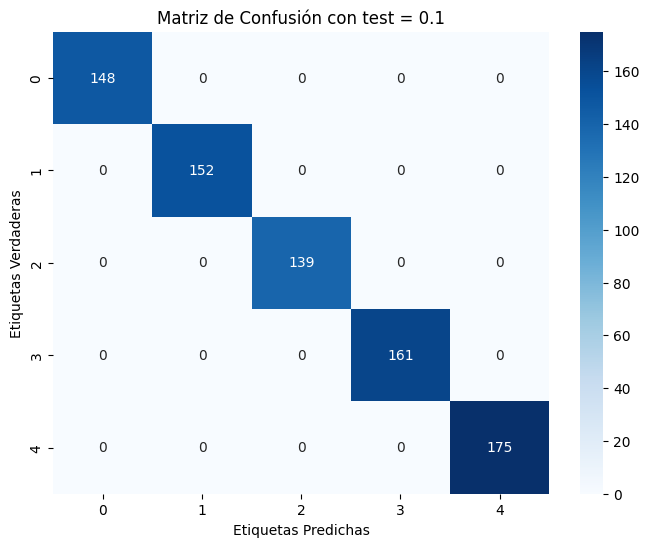

Exactitud del modelo: 1.0
Precisión del modelo: 1.0
Recall del modelo: 1.0
Puntuación F1 del modelo: 1.0
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.2.png


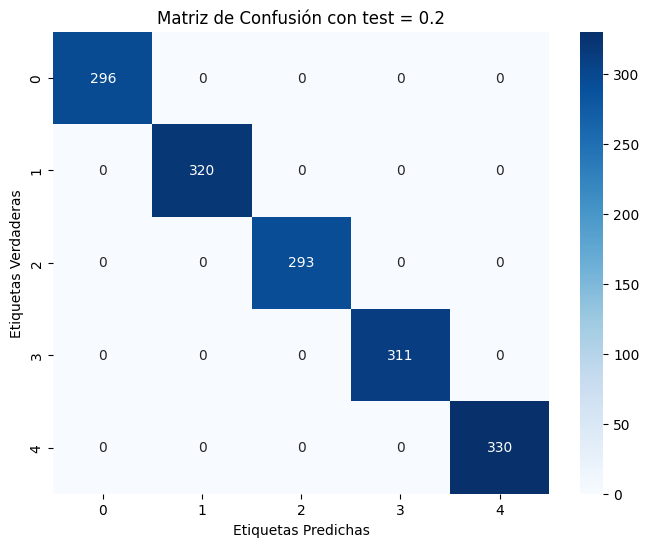

Exactitud del modelo: 1.0
Precisión del modelo: 1.0
Recall del modelo: 1.0
Puntuación F1 del modelo: 1.0
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.3.png


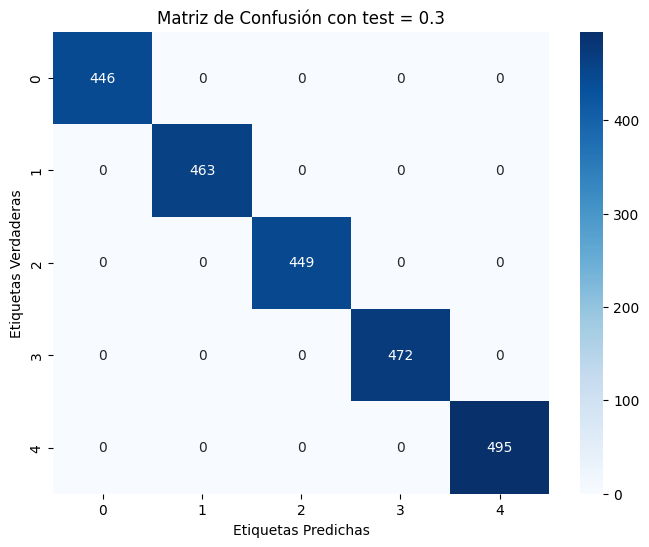

Exactitud del modelo: 1.0
Precisión del modelo: 1.0
Recall del modelo: 1.0
Puntuación F1 del modelo: 1.0
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.4.png


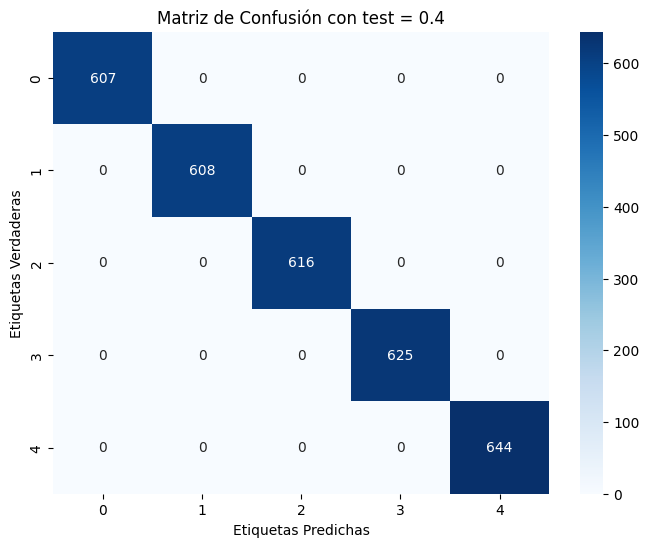

Exactitud del modelo: 1.0
Precisión del modelo: 1.0
Recall del modelo: 1.0
Puntuación F1 del modelo: 1.0
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.5.png


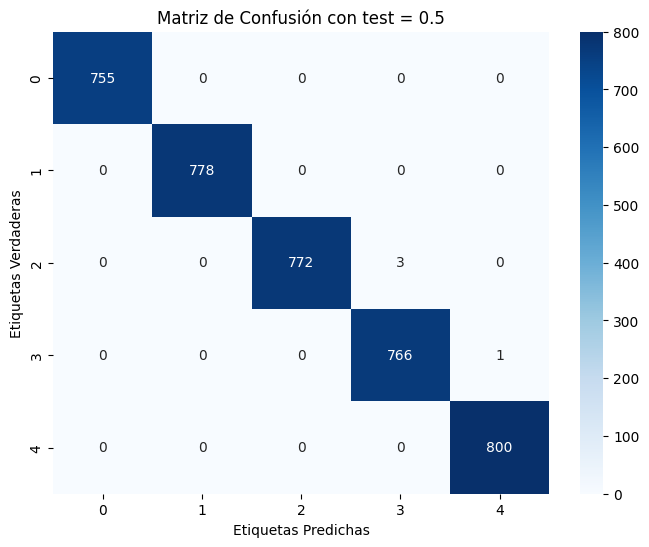

Exactitud del modelo: 0.9989677419354839
Precisión del modelo: 0.9989700776206846
Recall del modelo: 0.9989677419354839
Puntuación F1 del modelo: 0.9989677439008068
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.6.png


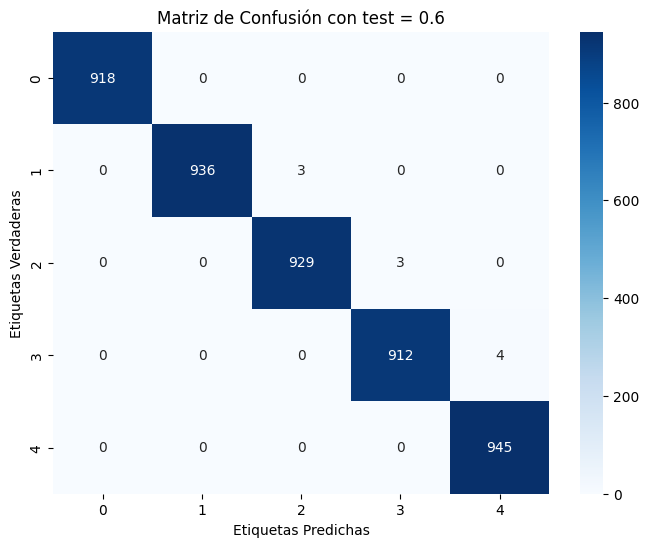

Exactitud del modelo: 0.9978494623655914
Precisión del modelo: 0.9978523830460112
Recall del modelo: 0.9978494623655914
Puntuación F1 del modelo: 0.9978494435142106
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.7.png


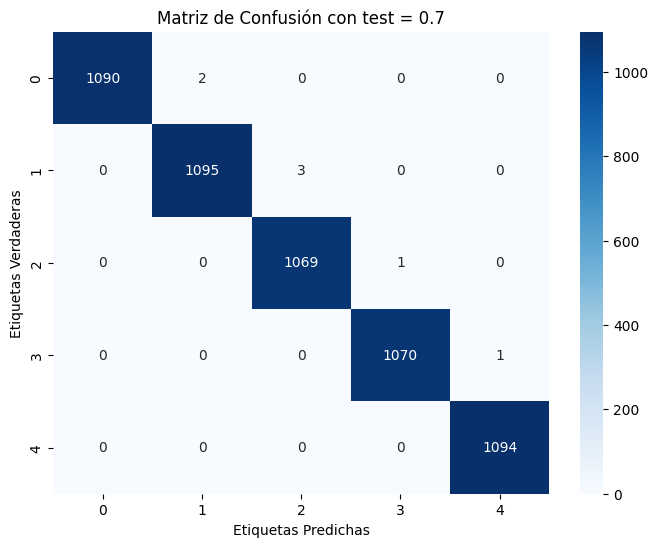

Exactitud del modelo: 0.9987096774193548
Precisión del modelo: 0.9987105414014522
Recall del modelo: 0.9987096774193548
Puntuación F1 del modelo: 0.9987096848453431
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.8.png


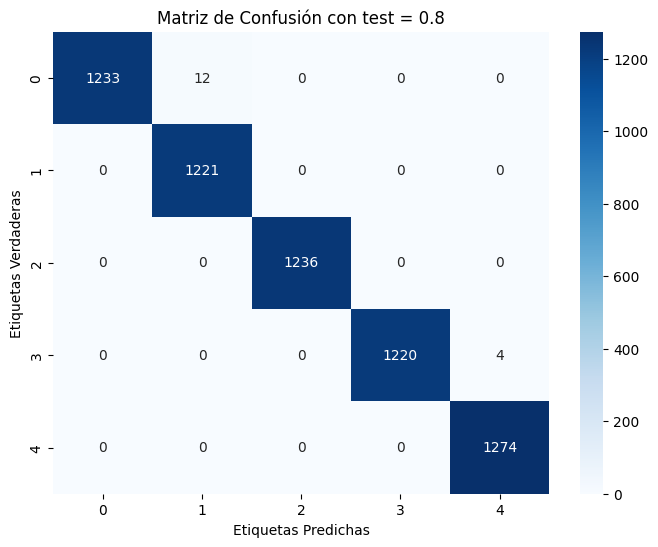

Exactitud del modelo: 0.9974193548387097
Precisión del modelo: 0.9974402109488681
Recall del modelo: 0.9974193548387097
Puntuación F1 del modelo: 0.9974193783285554
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.9.png


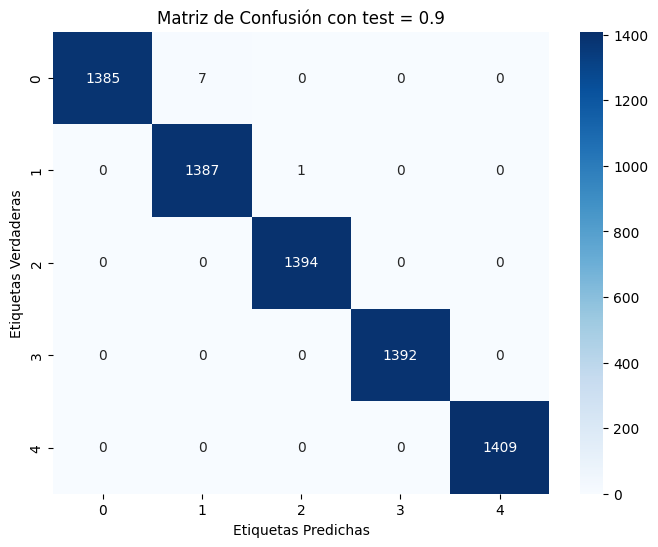

Exactitud del modelo: 0.9988530465949821
Precisión del modelo: 0.9988574689563725
Recall del modelo: 0.9988530465949821
Puntuación F1 del modelo: 0.9988530442569986
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_3_vecinos/KNN_glove_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta KNN_glove_embeddings_val_cruz_3_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_2.png


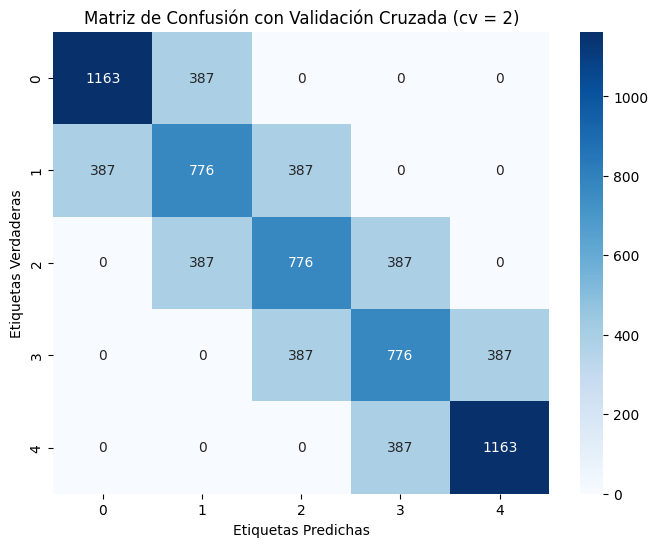

Exactitud media: 0.600516129032258
Precisión media: 0.600516129032258
Recall media: 0.600516129032258
Puntuación F1 media: 0.600516129032258
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_3.png


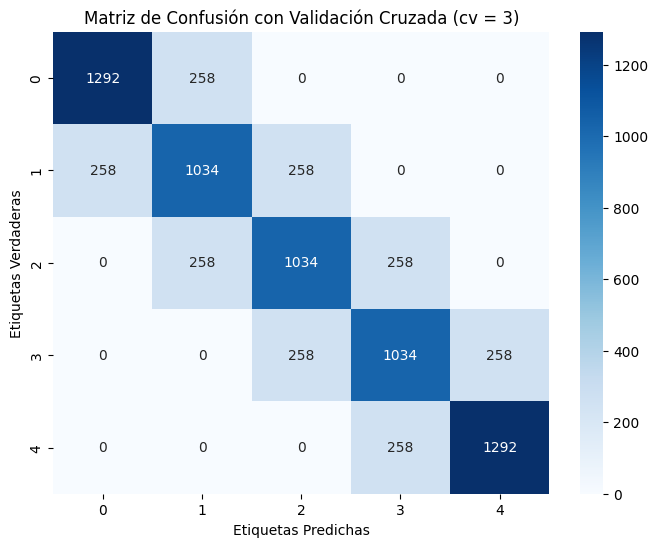

Exactitud media: 0.7336774193548387
Precisión media: 0.7336774193548387
Recall media: 0.7336774193548387
Puntuación F1 media: 0.7336774193548387
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_4.png


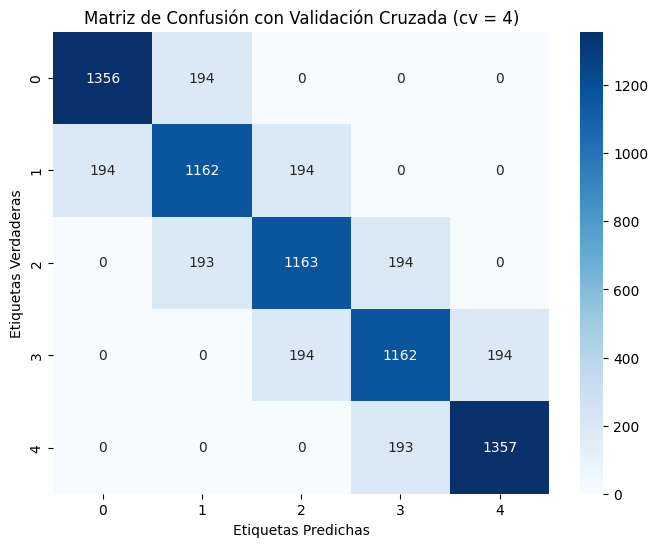

Exactitud media: 0.8
Precisión media: 0.7999839438152765
Recall media: 0.8
Puntuación F1 media: 0.7999919068703605
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_5.png


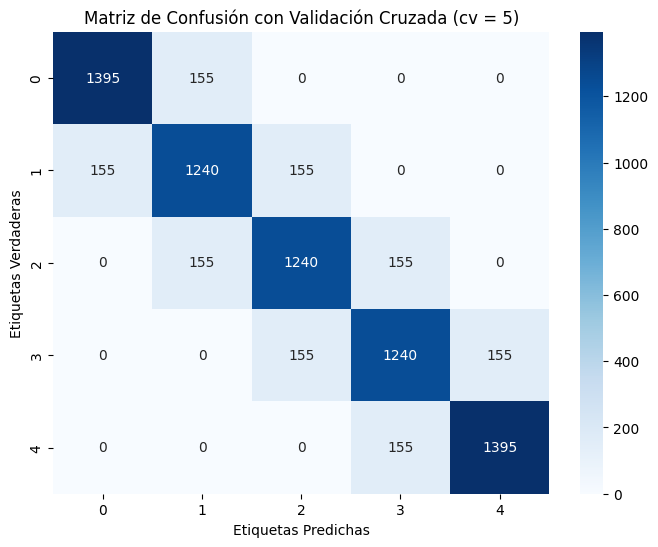

Exactitud media: 0.84
Precisión media: 0.84
Recall media: 0.84
Puntuación F1 media: 0.84
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_6.png


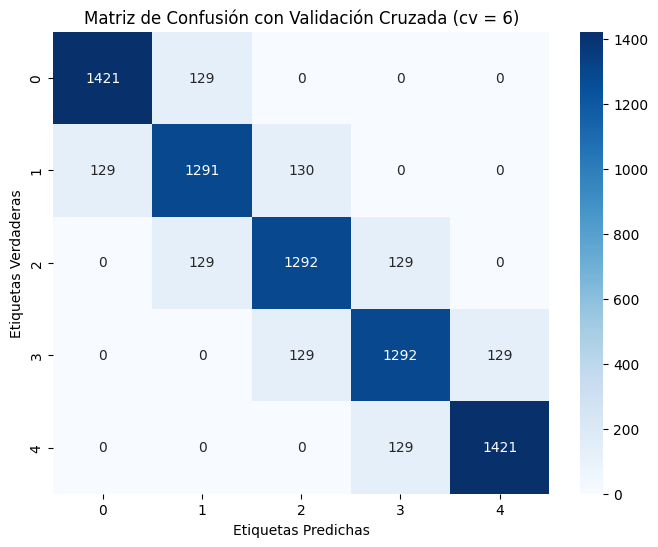

Exactitud media: 0.8667096774193548
Precisión media: 0.8667097328992208
Recall media: 0.8667096774193548
Puntuación F1 media: 0.8667096704776603
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_7.png


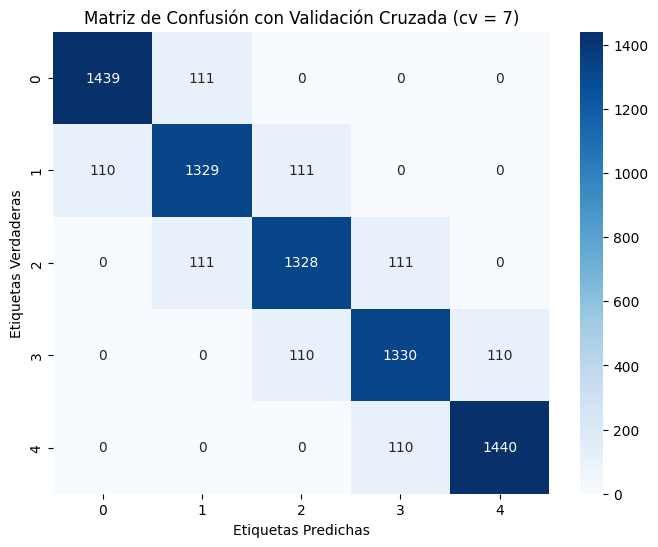

Exactitud media: 0.8859354838709678
Precisión media: 0.8859447659264577
Recall media: 0.8859354838709678
Puntuación F1 media: 0.8859400520430385
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_8.png


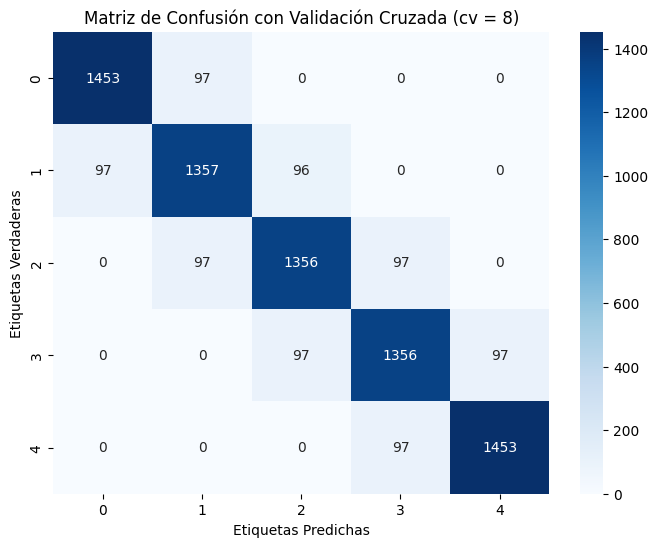

Exactitud media: 0.9
Precisión media: 0.9000000624618434
Recall media: 0.9
Puntuación F1 media: 0.8999999948037993
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_9.png


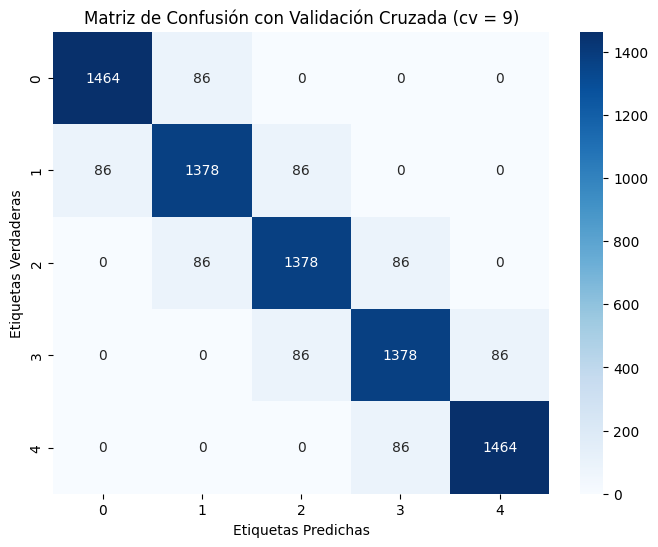

Exactitud media: 0.9112258064516129
Precisión media: 0.9112258064516129
Recall media: 0.9112258064516129
Puntuación F1 media: 0.9112258064516129
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_10.png


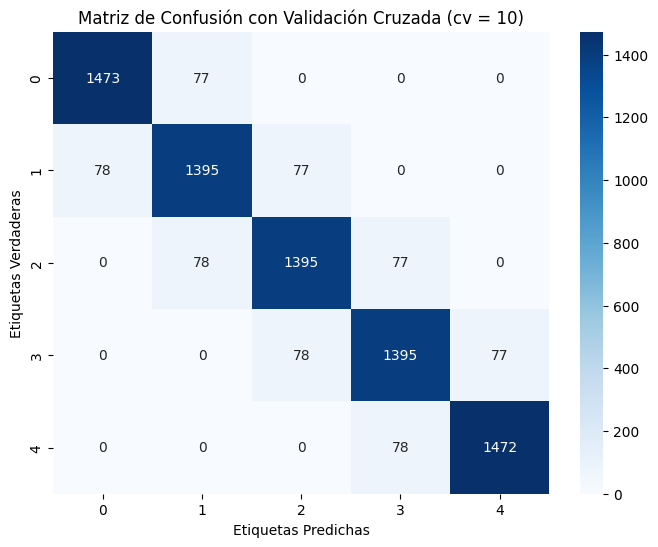

Exactitud media: 0.92
Precisión media: 0.9200000749219874
Recall media: 0.92
Puntuación F1 media: 0.9199999979188344
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_3_vecinos/KNN_glove_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta KNN_glove_embeddings_val_simple_5_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.1.png


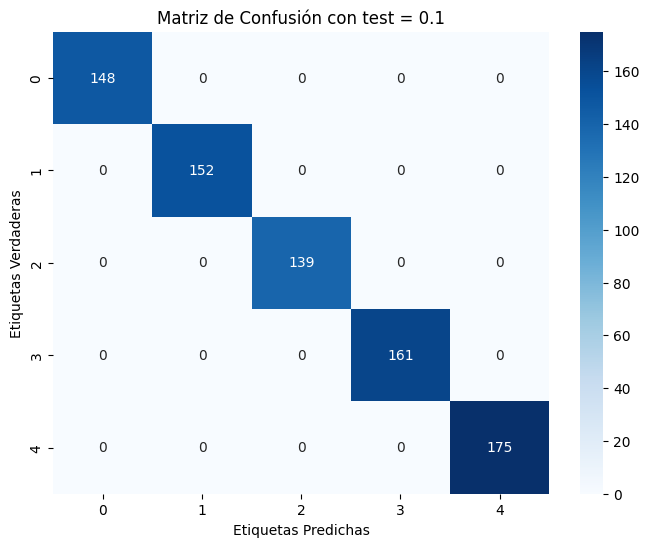

Exactitud del modelo: 1.0
Precisión del modelo: 1.0
Recall del modelo: 1.0
Puntuación F1 del modelo: 1.0
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.2.png


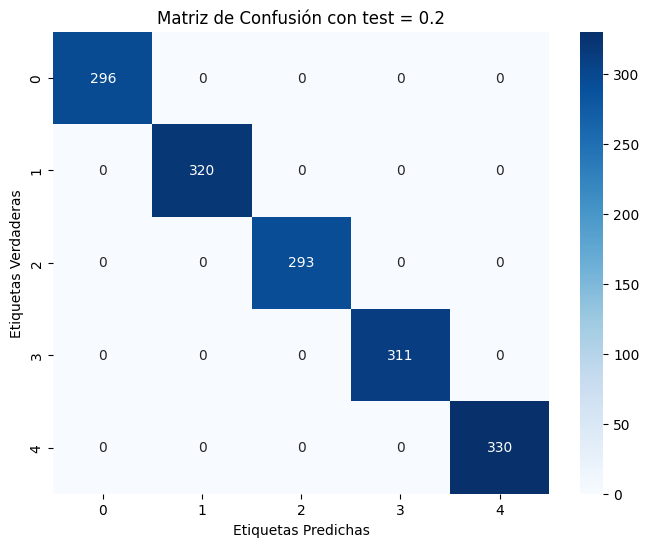

Exactitud del modelo: 1.0
Precisión del modelo: 1.0
Recall del modelo: 1.0
Puntuación F1 del modelo: 1.0
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.3.png


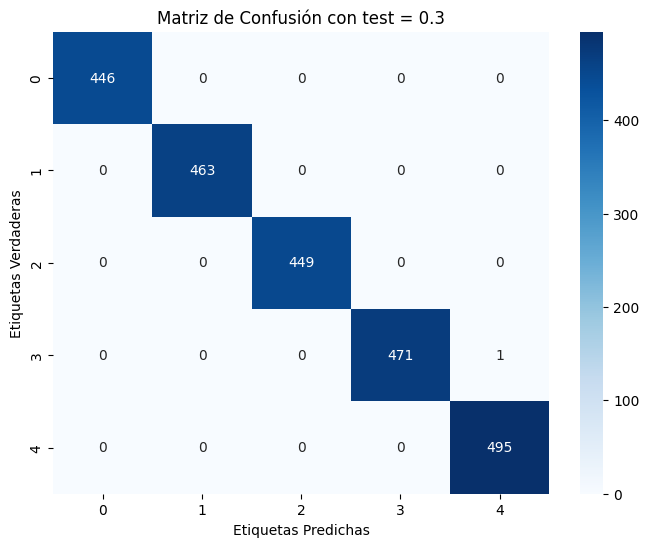

Exactitud del modelo: 0.9995698924731182
Precisión del modelo: 0.9995707596253902
Recall del modelo: 0.9995698924731182
Puntuación F1 del modelo: 0.9995698814271717
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.4.png


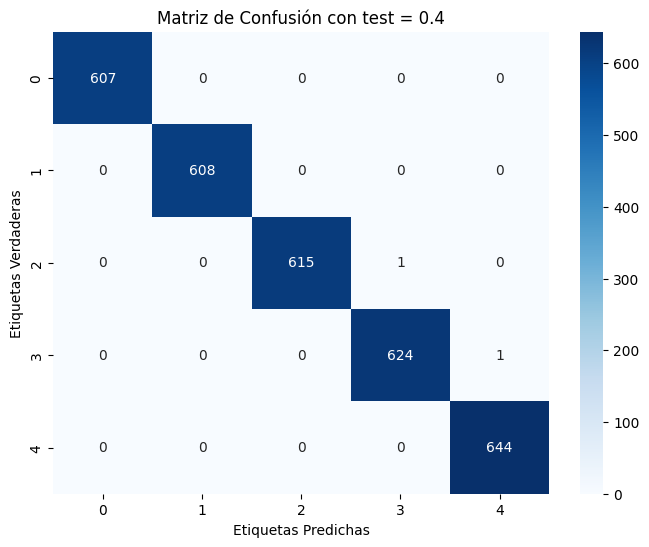

Exactitud del modelo: 0.9993548387096775
Precisión del modelo: 0.9993553388347087
Recall del modelo: 0.9993548387096775
Puntuación F1 del modelo: 0.9993548328141137
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.5.png


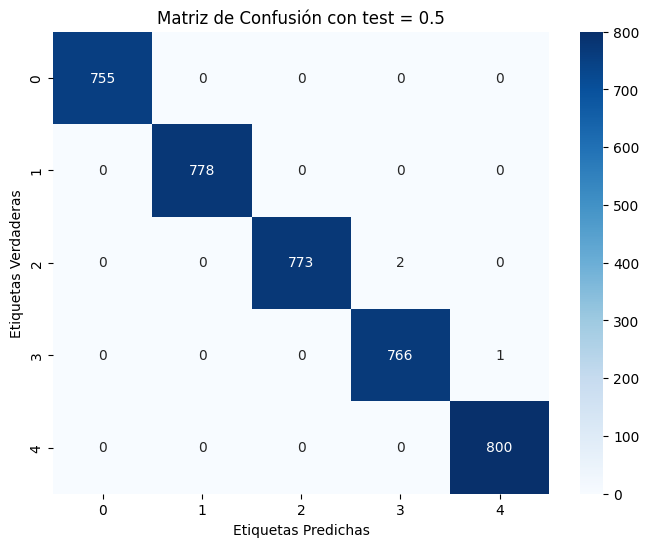

Exactitud del modelo: 0.9992258064516129
Precisión del modelo: 0.9992268006725464
Recall del modelo: 0.9992258064516129
Puntuación F1 del modelo: 0.9992258058100238
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.6.png


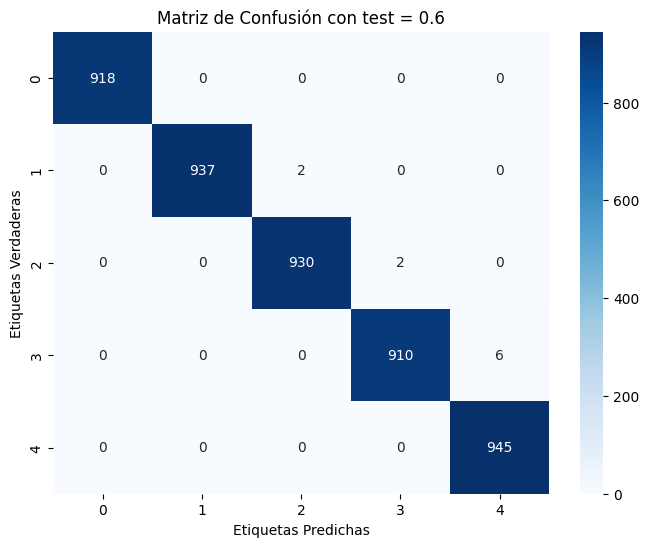

Exactitud del modelo: 0.9978494623655914
Precisión del modelo: 0.9978557167655409
Recall del modelo: 0.9978494623655914
Puntuación F1 del modelo: 0.9978493924381883
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.7.png


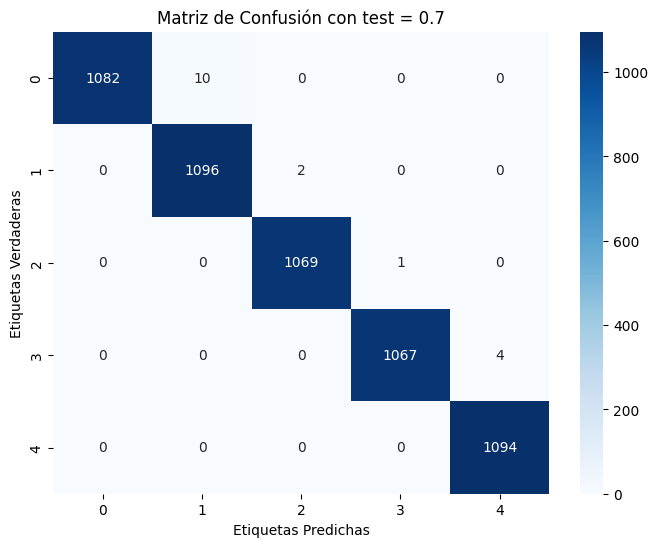

Exactitud del modelo: 0.9968663594470046
Precisión del modelo: 0.9968822051805395
Recall del modelo: 0.9968663594470046
Puntuación F1 del modelo: 0.9968662900341426
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.8.png


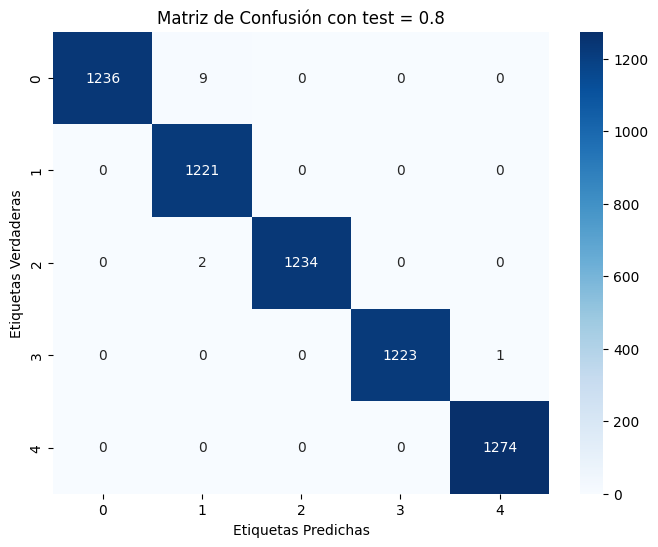

Exactitud del modelo: 0.9980645161290322
Precisión del modelo: 0.9980804836450708
Recall del modelo: 0.9980645161290322
Puntuación F1 del modelo: 0.9980657293098667
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.9.png


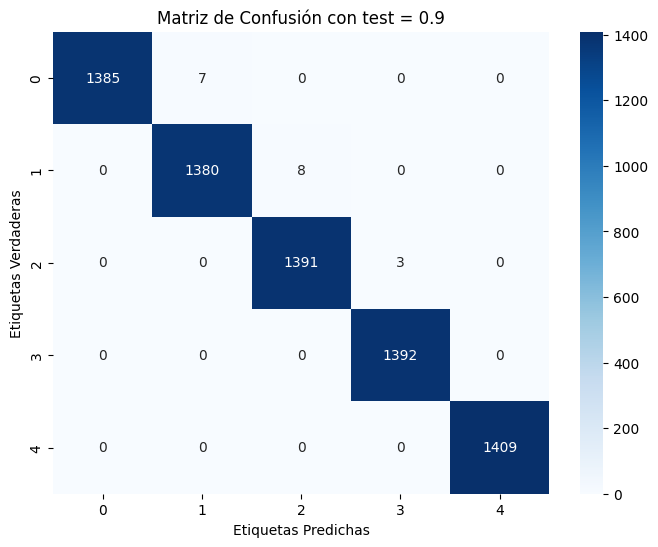

Exactitud del modelo: 0.9974193548387097
Precisión del modelo: 0.9974236554265936
Recall del modelo: 0.9974193548387097
Puntuación F1 del modelo: 0.9974193455928435
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_5_vecinos/KNN_glove_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta KNN_glove_embeddings_val_cruz_5_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_2.png


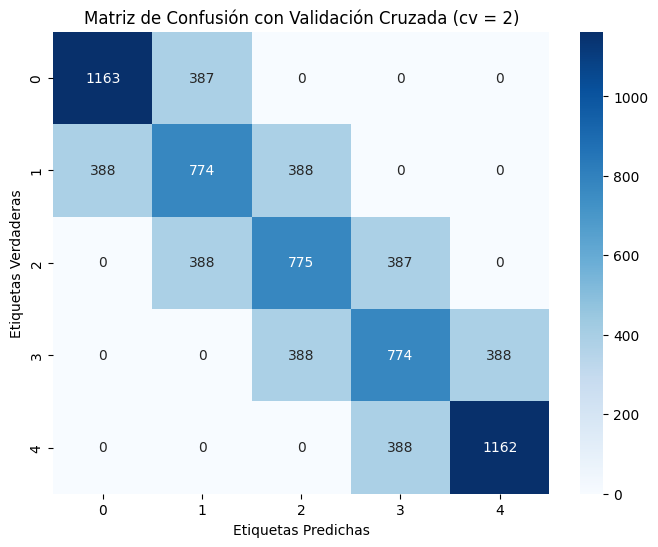

Exactitud media: 0.599741935483871
Precisión media: 0.5997096565137036
Recall media: 0.599741935483871
Puntuación F1 media: 0.5997257491977382
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_3.png


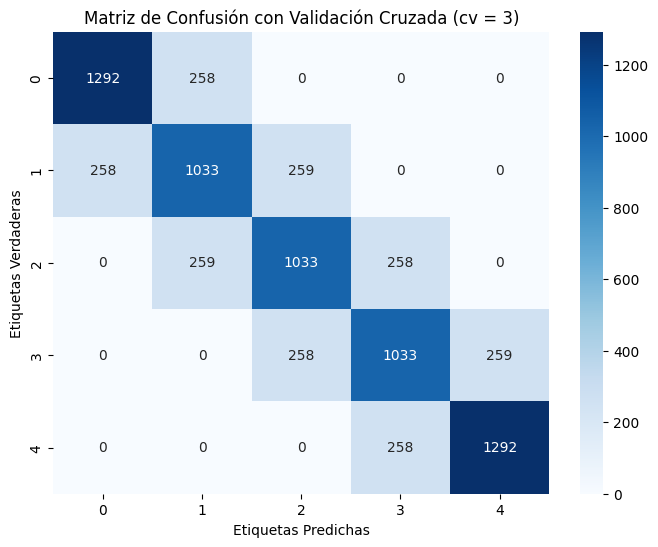

Exactitud media: 0.7332903225806452
Precisión media: 0.7332688865675605
Recall media: 0.7332903225806452
Puntuación F1 media: 0.7332795733599636
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_4.png


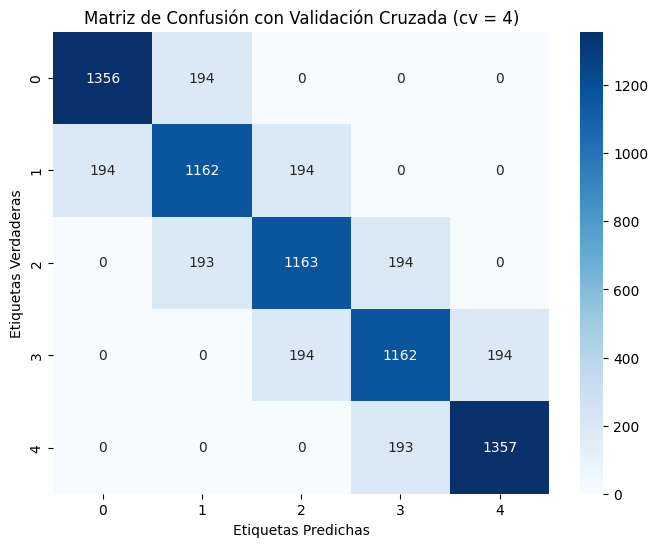

Exactitud media: 0.8
Precisión media: 0.7999839438152765
Recall media: 0.8
Puntuación F1 media: 0.7999919068703605
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_5.png


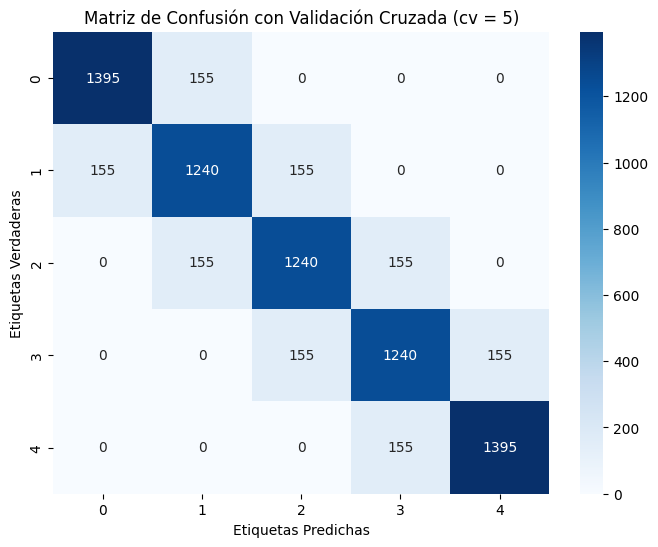

Exactitud media: 0.84
Precisión media: 0.84
Recall media: 0.84
Puntuación F1 media: 0.84
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_6.png


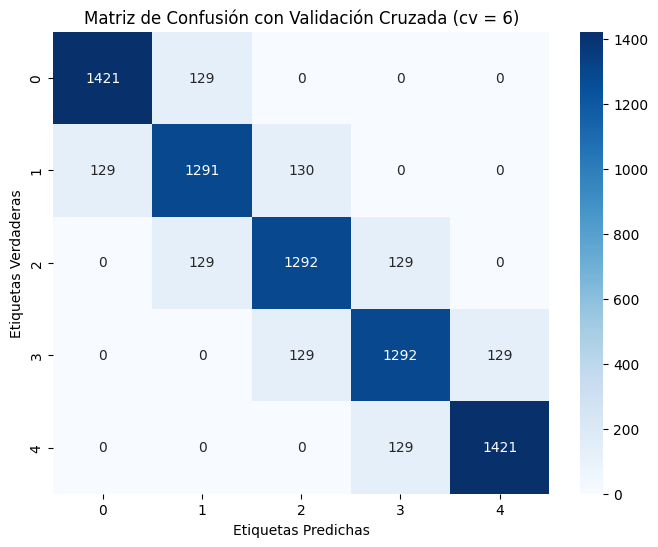

Exactitud media: 0.8667096774193548
Precisión media: 0.8667097328992208
Recall media: 0.8667096774193548
Puntuación F1 media: 0.8667096704776603
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_7.png


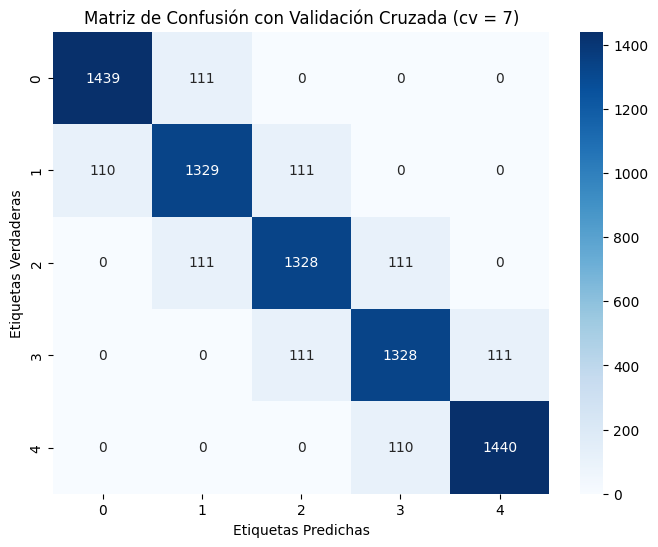

Exactitud media: 0.8856774193548387
Precisión media: 0.8856775501863524
Recall media: 0.8856774193548387
Puntuación F1 media: 0.8856774104393934
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_8.png


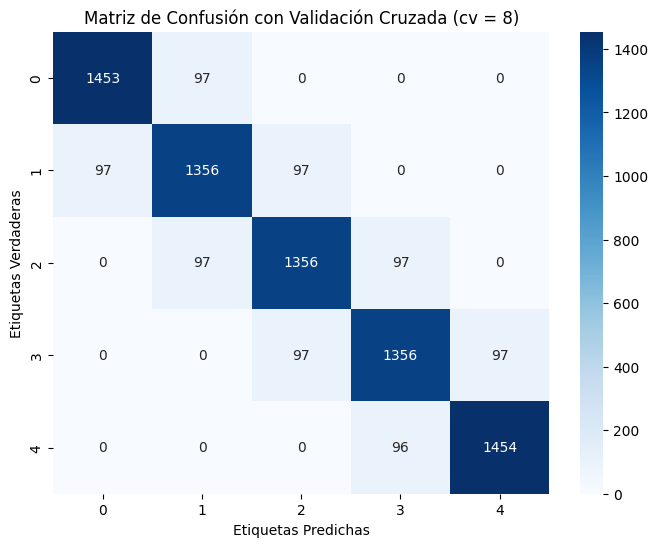

Exactitud media: 0.9
Precisión media: 0.8999919927461552
Recall media: 0.9
Puntuación F1 media: 0.8999959586448079
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_9.png


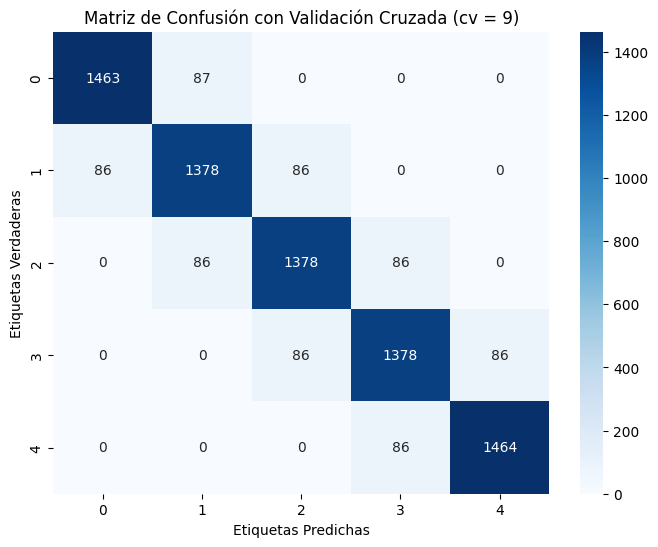

Exactitud media: 0.9110967741935484
Precisión media: 0.911104002742091
Recall media: 0.9110967741935484
Puntuación F1 media: 0.9111003503209387
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_10.png


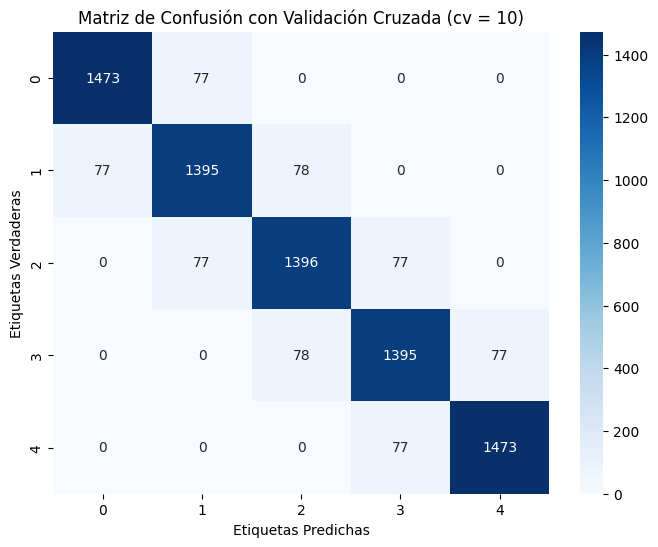

Exactitud media: 0.920258064516129
Precisión media: 0.9202583474797239
Recall media: 0.920258064516129
Puntuación F1 media: 0.9202580936699007
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_5_vecinos/KNN_glove_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta KNN_glove_embeddings_val_simple_7_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.1.png


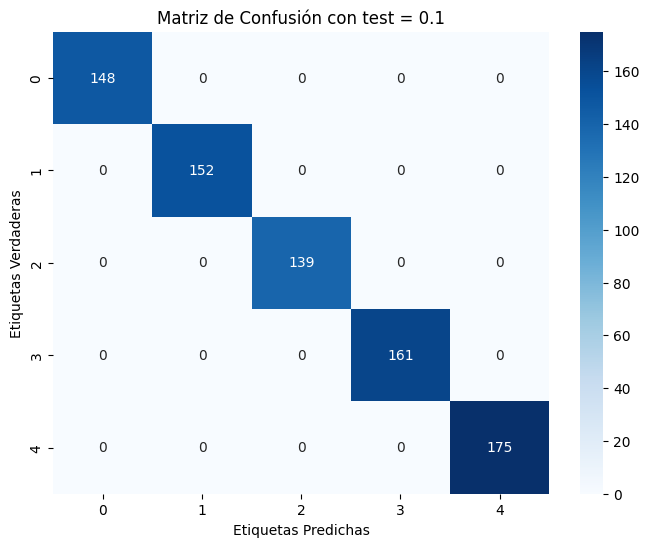

Exactitud del modelo: 1.0
Precisión del modelo: 1.0
Recall del modelo: 1.0
Puntuación F1 del modelo: 1.0
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.2.png


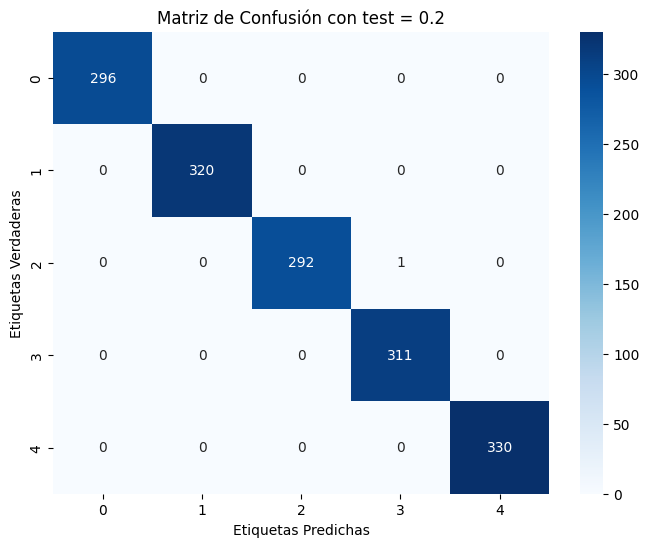

Exactitud del modelo: 0.9993548387096775
Precisión del modelo: 0.9993569065343259
Recall del modelo: 0.9993548387096775
Puntuación F1 del modelo: 0.9993548050757184
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.3.png


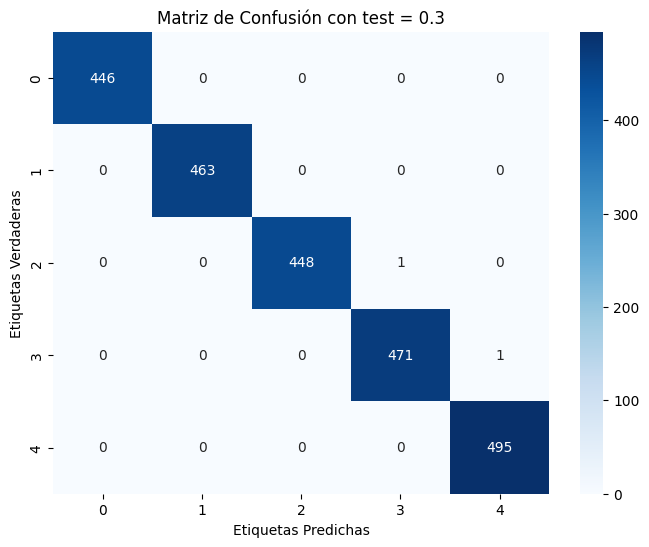

Exactitud del modelo: 0.9991397849462366
Precisión del modelo: 0.9991406520985084
Recall del modelo: 0.9991397849462366
Puntuación F1 del modelo: 0.9991397622052762
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.4.png


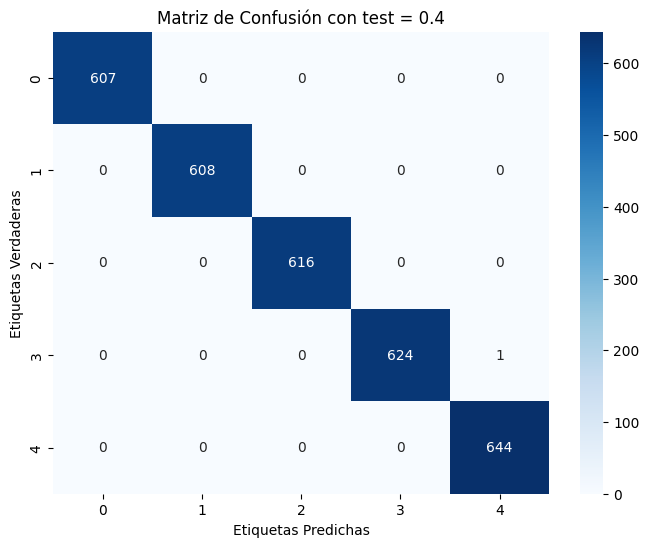

Exactitud del modelo: 0.9996774193548387
Precisión del modelo: 0.9996779194798701
Recall del modelo: 0.9996774193548387
Puntuación F1 del modelo: 0.9996774153475286
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.5.png


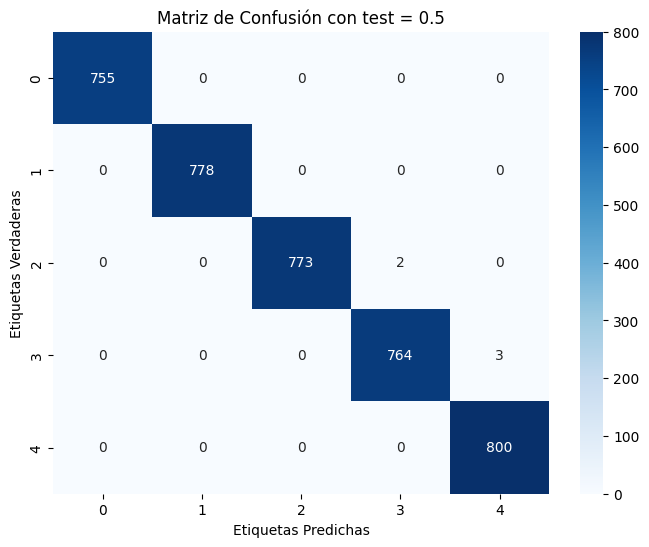

Exactitud del modelo: 0.9987096774193548
Precisión del modelo: 0.9987118960010464
Recall del modelo: 0.9987096774193548
Puntuación F1 del modelo: 0.9987096476019266
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.6.png


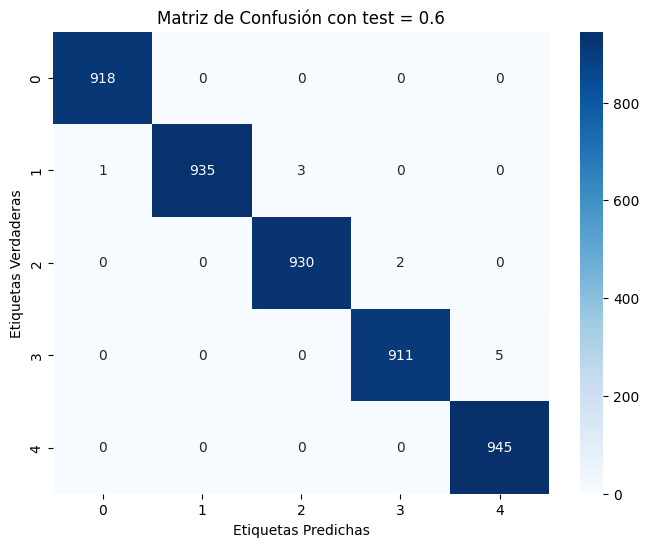

Exactitud del modelo: 0.9976344086021506
Precisión del modelo: 0.9976395801336189
Recall del modelo: 0.9976344086021506
Puntuación F1 del modelo: 0.9976340213303488
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.7.png


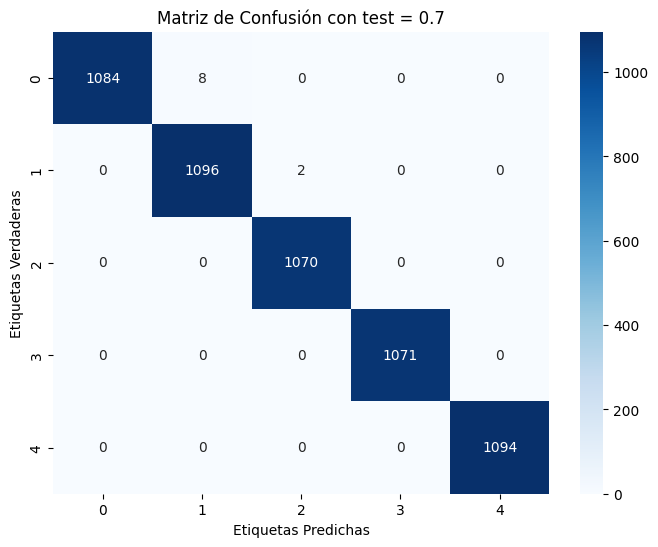

Exactitud del modelo: 0.9981566820276497
Precisión del modelo: 0.9981653842588301
Recall del modelo: 0.9981566820276497
Puntuación F1 del modelo: 0.9981566547101687
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.8.png


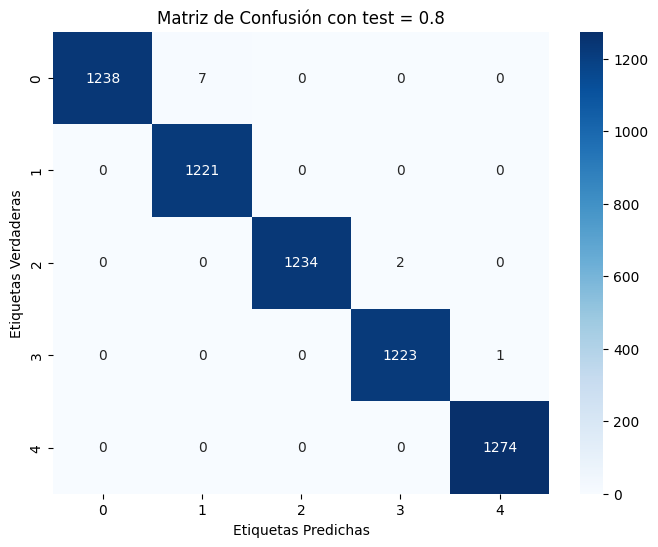

Exactitud del modelo: 0.9983870967741936
Precisión del modelo: 0.9983939224591801
Recall del modelo: 0.9983870967741936
Puntuación F1 del modelo: 0.9983871186968865
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.9.png


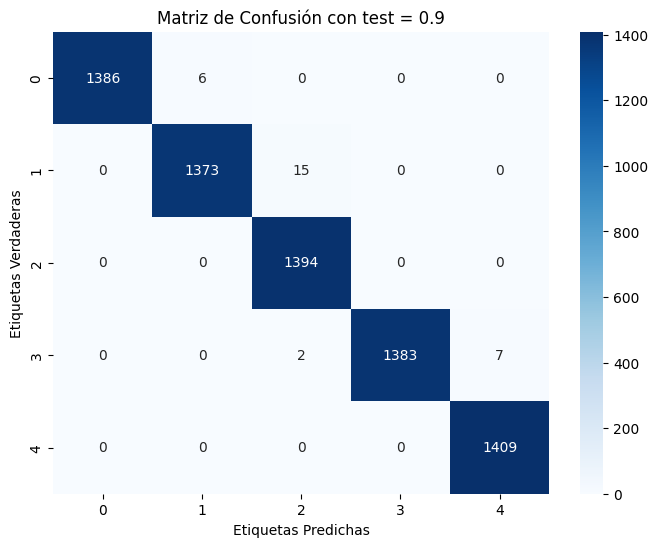

Exactitud del modelo: 0.9956989247311828
Precisión del modelo: 0.9957276365571541
Recall del modelo: 0.9956989247311828
Puntuación F1 del modelo: 0.9956996360042872
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_7_vecinos/KNN_glove_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta KNN_glove_embeddings_val_cruz_7_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_2.png


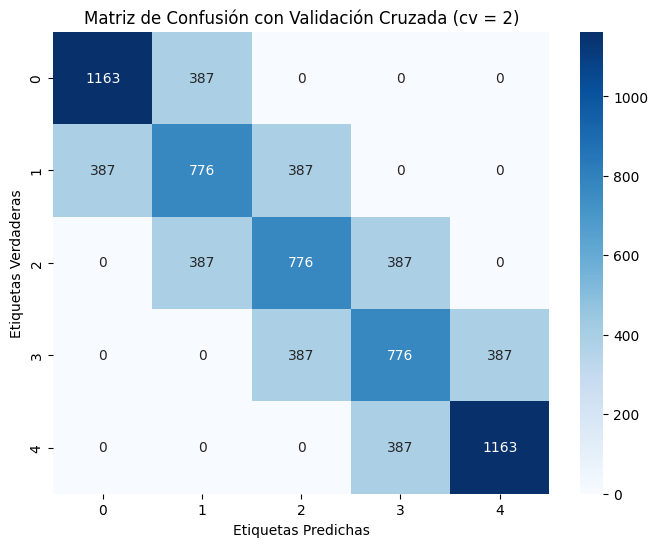

Exactitud media: 0.600516129032258
Precisión media: 0.600516129032258
Recall media: 0.600516129032258
Puntuación F1 media: 0.600516129032258
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_3.png


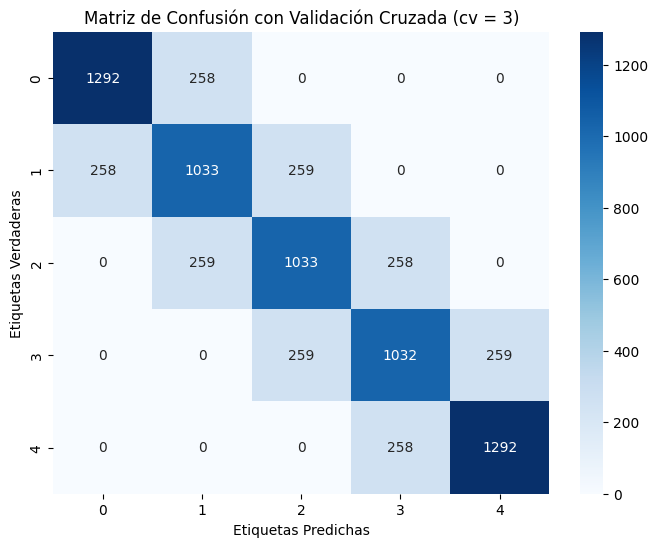

Exactitud media: 0.7331612903225806
Precisión media: 0.7331399097356545
Recall media: 0.7331612903225806
Puntuación F1 media: 0.73315051330825
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_4.png


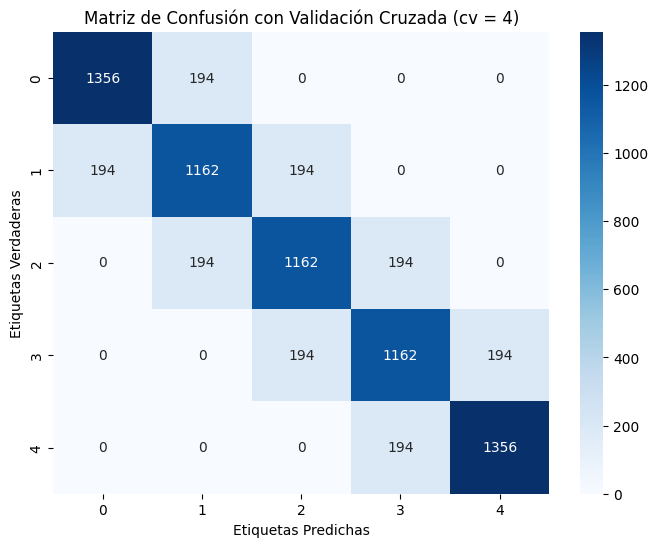

Exactitud media: 0.799741935483871
Precisión media: 0.799741935483871
Recall media: 0.799741935483871
Puntuación F1 media: 0.799741935483871
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_5.png


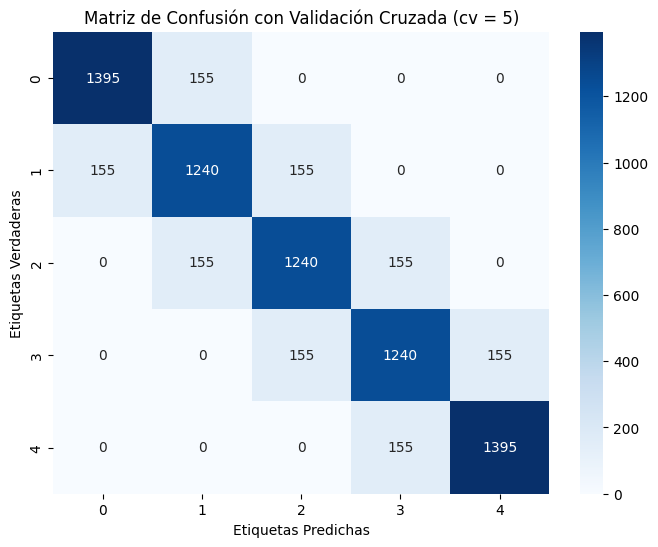

Exactitud media: 0.84
Precisión media: 0.84
Recall media: 0.84
Puntuación F1 media: 0.84
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_6.png


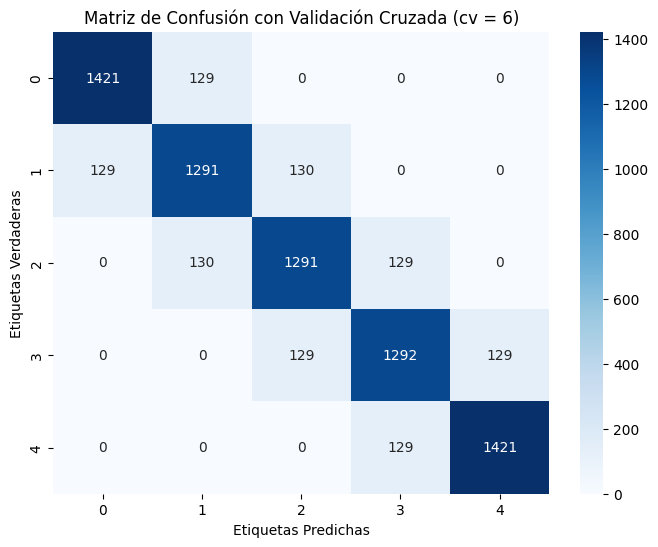

Exactitud media: 0.8665806451612903
Precisión media: 0.8665806451612903
Recall media: 0.8665806451612903
Puntuación F1 media: 0.8665806451612903
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_7.png


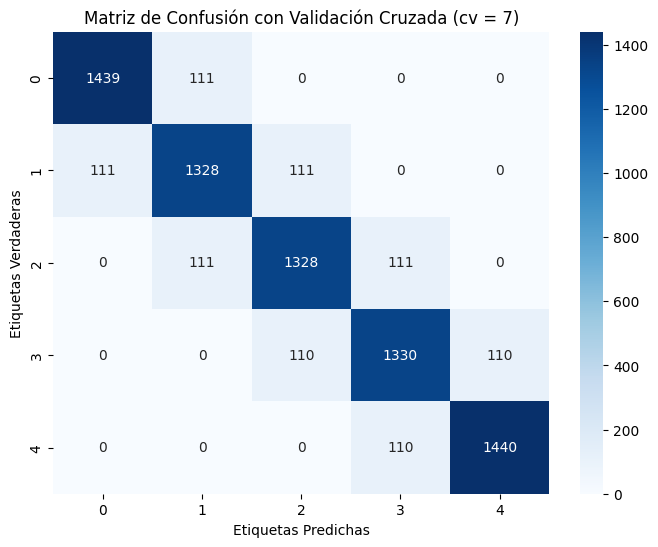

Exactitud media: 0.8858064516129033
Precisión media: 0.8858064278741803
Recall media: 0.8858064516129033
Puntuación F1 media: 0.885806404054911
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_8.png


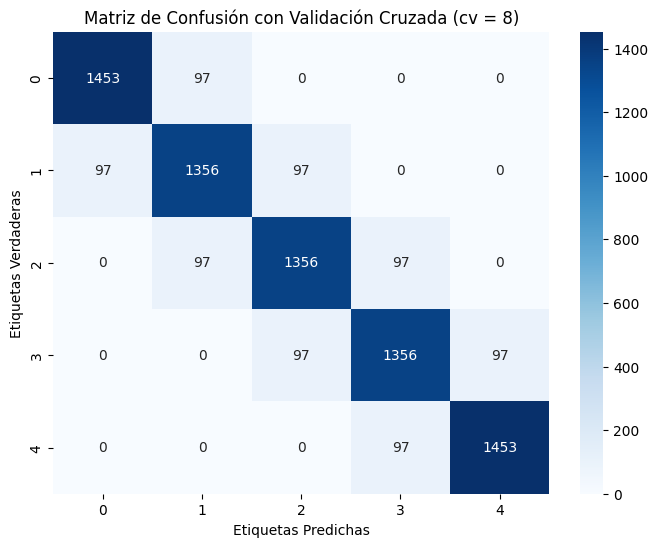

Exactitud media: 0.8998709677419355
Precisión media: 0.8998709677419355
Recall media: 0.8998709677419355
Puntuación F1 media: 0.8998709677419355
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_9.png


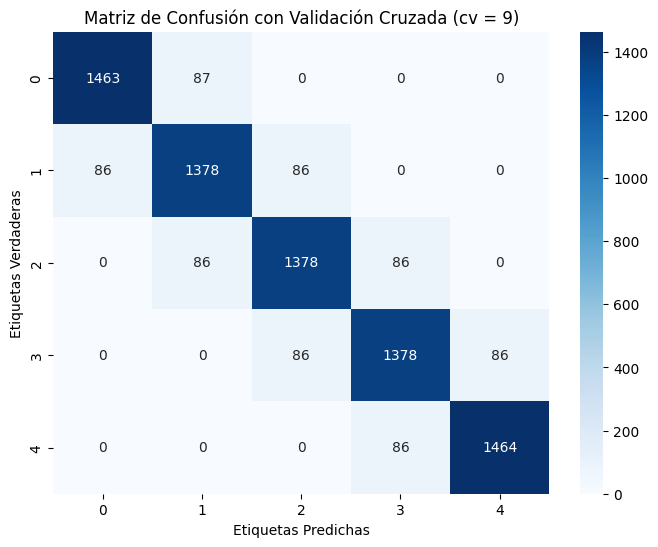

Exactitud media: 0.9110967741935484
Precisión media: 0.911104002742091
Recall media: 0.9110967741935484
Puntuación F1 media: 0.9111003503209387
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_10.png


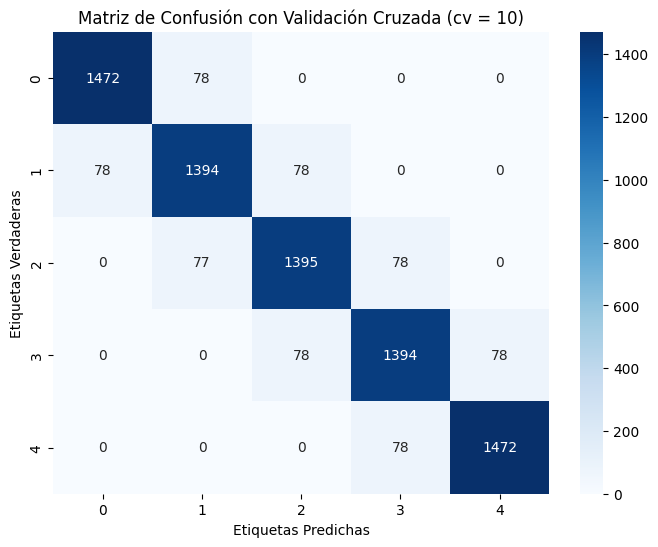

Exactitud media: 0.9196129032258065
Precisión media: 0.9196129697694211
Recall media: 0.9196129032258065
Puntuación F1 media: 0.9196128990500483
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_7_vecinos/KNN_glove_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta KNN_glove_embeddings_val_simple_9_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.1.png


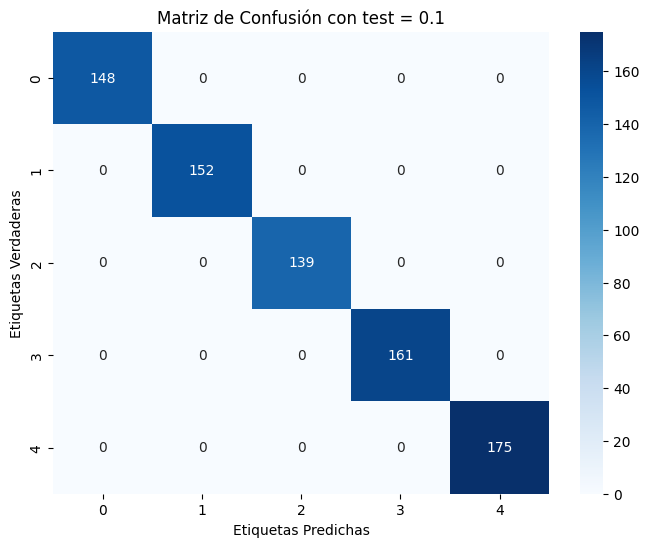

Exactitud del modelo: 1.0
Precisión del modelo: 1.0
Recall del modelo: 1.0
Puntuación F1 del modelo: 1.0
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.2.png


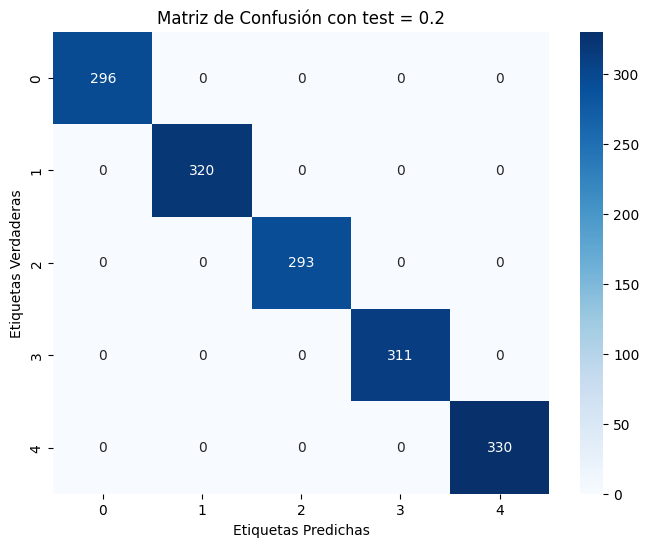

Exactitud del modelo: 1.0
Precisión del modelo: 1.0
Recall del modelo: 1.0
Puntuación F1 del modelo: 1.0
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.3.png


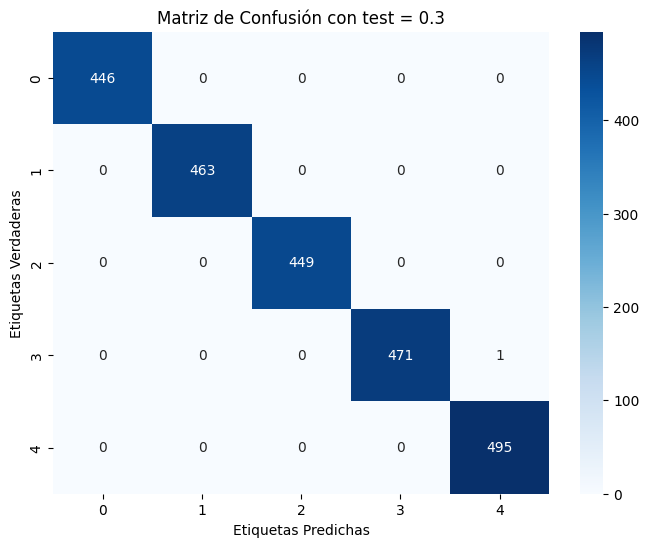

Exactitud del modelo: 0.9995698924731182
Precisión del modelo: 0.9995707596253902
Recall del modelo: 0.9995698924731182
Puntuación F1 del modelo: 0.9995698814271717
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.4.png


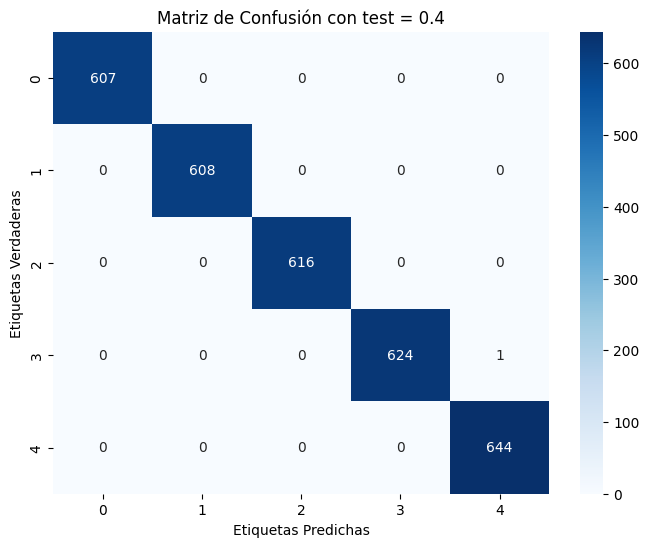

Exactitud del modelo: 0.9996774193548387
Precisión del modelo: 0.9996779194798701
Recall del modelo: 0.9996774193548387
Puntuación F1 del modelo: 0.9996774153475286
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.5.png


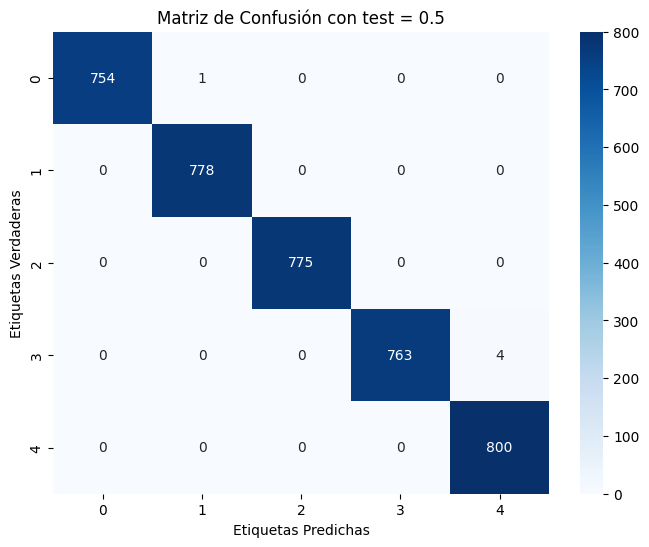

Exactitud del modelo: 0.9987096774193548
Precisión del modelo: 0.9987151443082735
Recall del modelo: 0.9987096774193548
Puntuación F1 del modelo: 0.9987096125311276
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.6.png


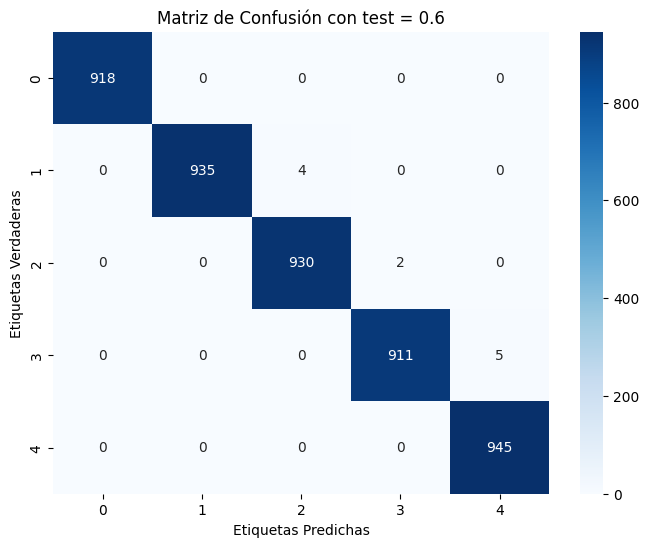

Exactitud del modelo: 0.9976344086021506
Precisión del modelo: 0.9976404966362269
Recall del modelo: 0.9976344086021506
Puntuación F1 del modelo: 0.9976343660117689
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.7.png


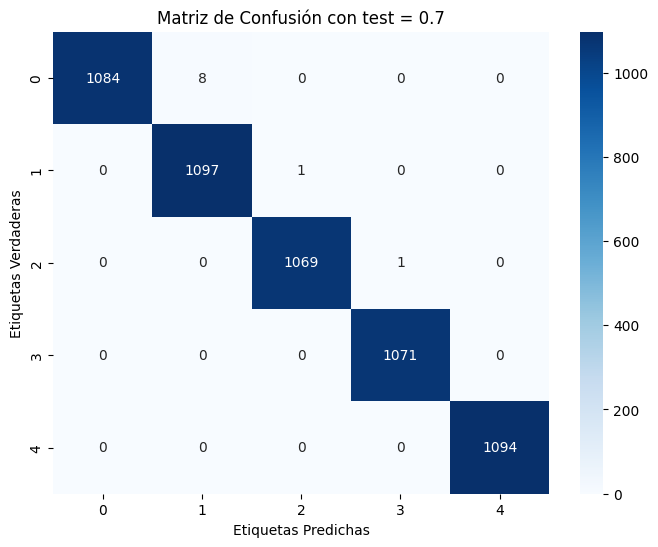

Exactitud del modelo: 0.9981566820276497
Precisión del modelo: 0.9981661956808945
Recall del modelo: 0.9981566820276497
Puntuación F1 del modelo: 0.9981566499758598
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.8.png


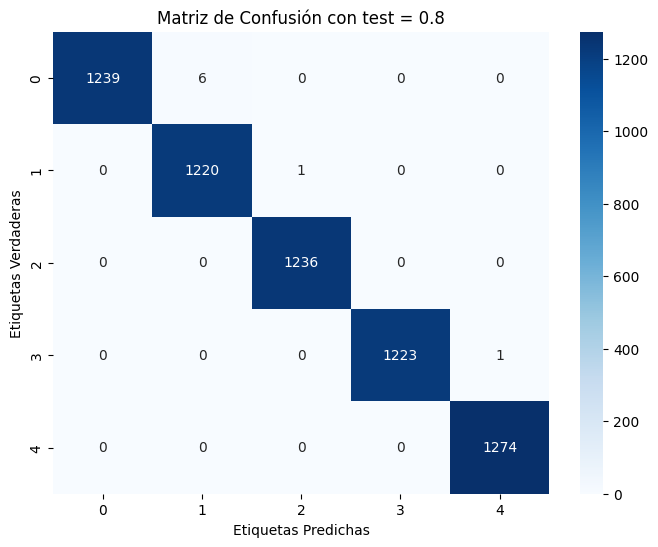

Exactitud del modelo: 0.9987096774193548
Precisión del modelo: 0.9987138810551156
Recall del modelo: 0.9987096774193548
Puntuación F1 del modelo: 0.9987096934265344
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.9.png


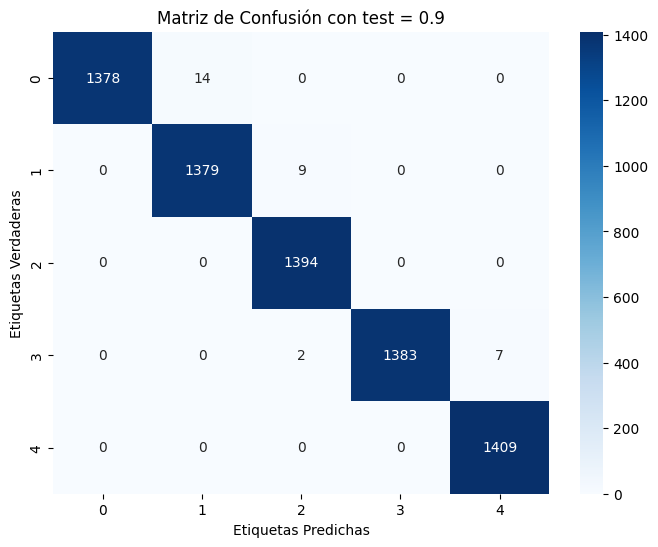

Exactitud del modelo: 0.9954121863799283
Precisión del modelo: 0.9954366991788526
Recall del modelo: 0.9954121863799283
Puntuación F1 del modelo: 0.9954123282851151
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_9_vecinos/KNN_glove_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta KNN_glove_embeddings_val_cruz_9_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_2.png


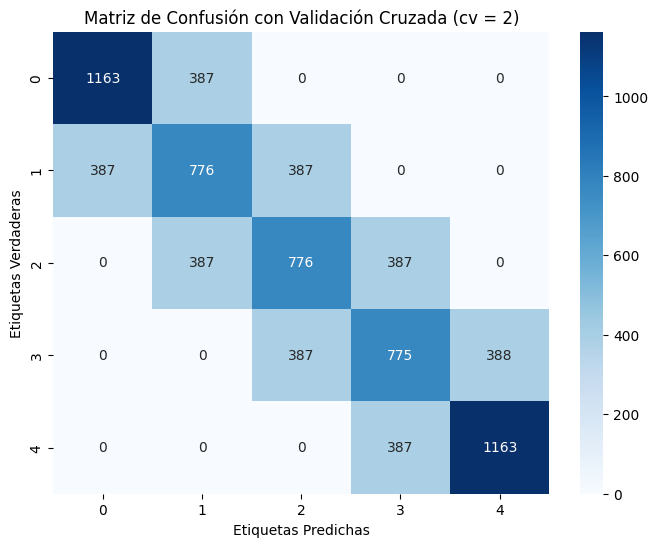

Exactitud media: 0.6003870967741936
Precisión media: 0.6003549011580939
Recall media: 0.6003870967741936
Puntuación F1 media: 0.6003709729498847
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_3.png


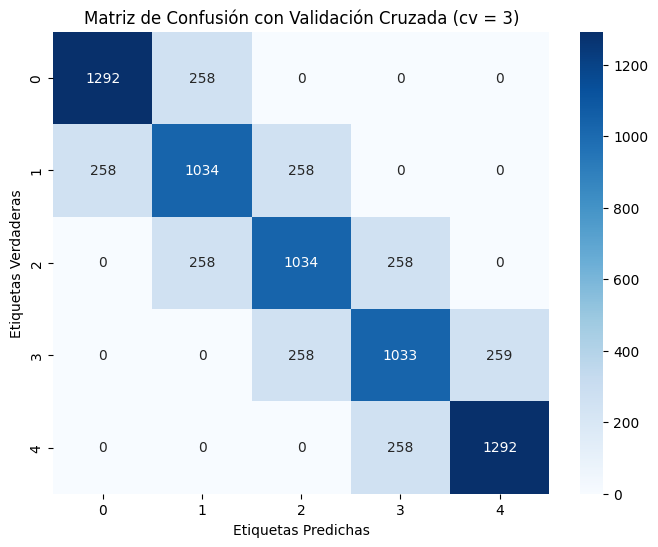

Exactitud media: 0.7335483870967742
Precisión media: 0.7335269510836895
Recall media: 0.7335483870967742
Puntuación F1 media: 0.7335376378760926
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_4.png


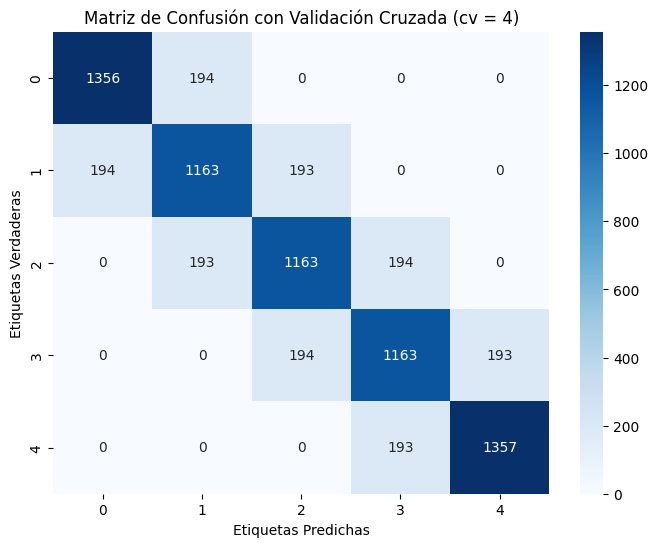

Exactitud media: 0.800258064516129
Precisión media: 0.800258064516129
Recall media: 0.800258064516129
Puntuación F1 media: 0.800258064516129
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_5.png


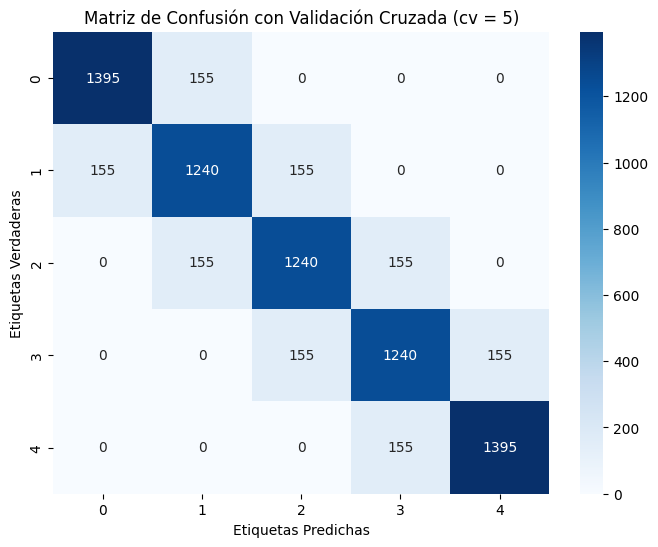

Exactitud media: 0.84
Precisión media: 0.84
Recall media: 0.84
Puntuación F1 media: 0.84
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_6.png


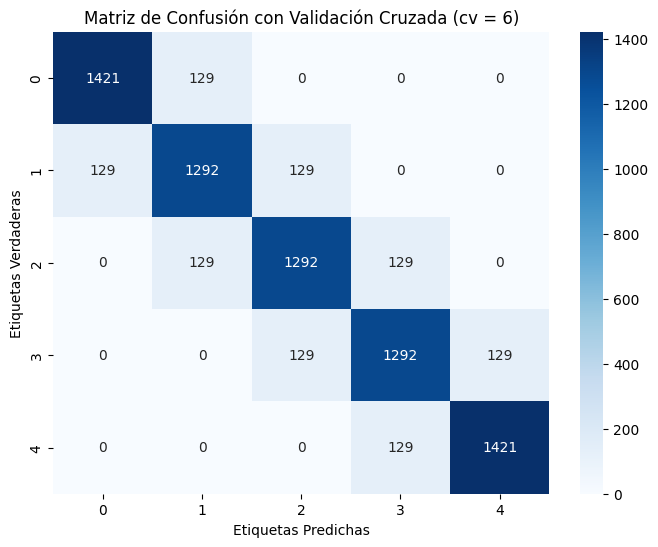

Exactitud media: 0.8668387096774194
Precisión media: 0.8668387096774194
Recall media: 0.8668387096774194
Puntuación F1 media: 0.8668387096774194
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_7.png


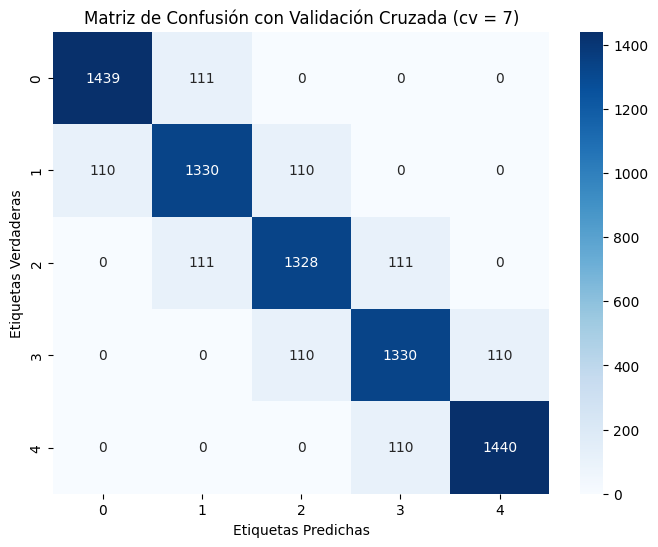

Exactitud media: 0.8860645161290323
Precisión media: 0.8860739767623165
Recall media: 0.8860645161290323
Puntuación F1 media: 0.8860690665104859
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_8.png


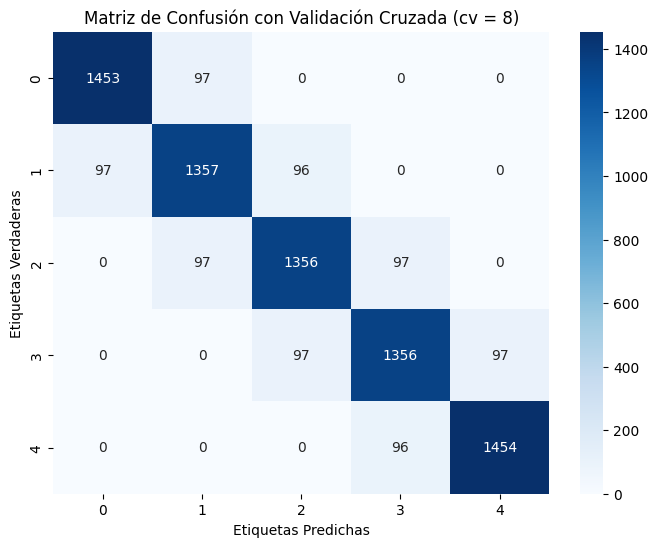

Exactitud media: 0.9001290322580645
Precisión media: 0.9001210874660631
Recall media: 0.9001290322580645
Puntuación F1 media: 0.9001249857066718
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_9.png


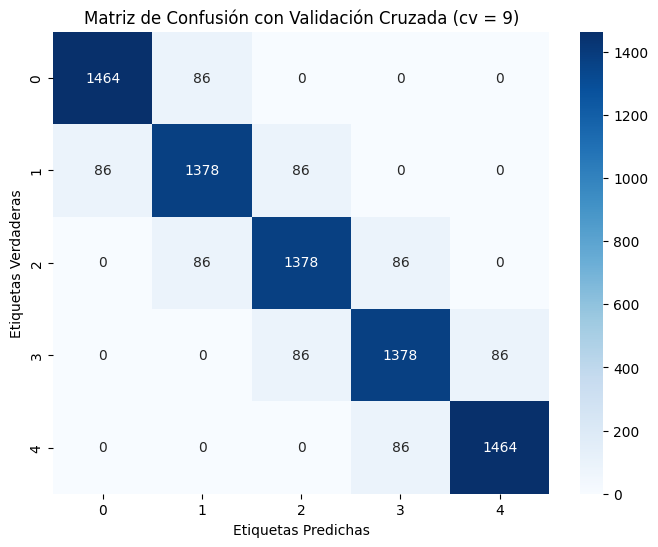

Exactitud media: 0.9112258064516129
Precisión media: 0.9112258064516129
Recall media: 0.9112258064516129
Puntuación F1 media: 0.9112258064516129
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_10.png


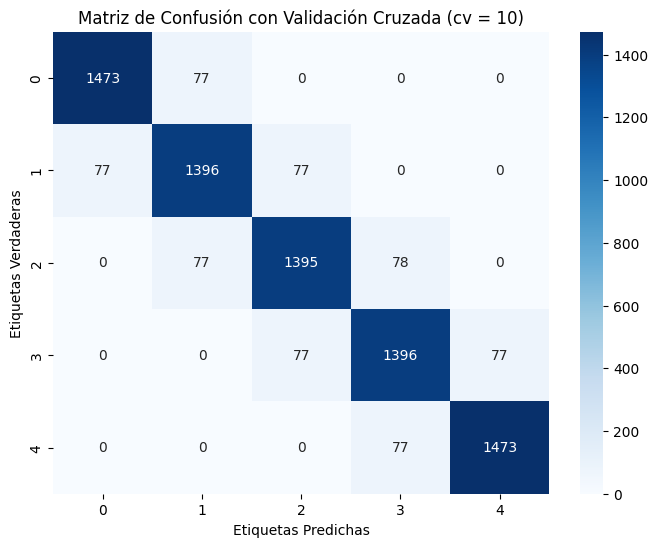

Exactitud media: 0.9203870967741935
Precisión media: 0.9203871634252233
Recall media: 0.9203870967741935
Puntuación F1 media: 0.9203870926252891
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_9_vecinos/KNN_glove_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta KNN_glove_embeddings_val_simple_11_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.1.png


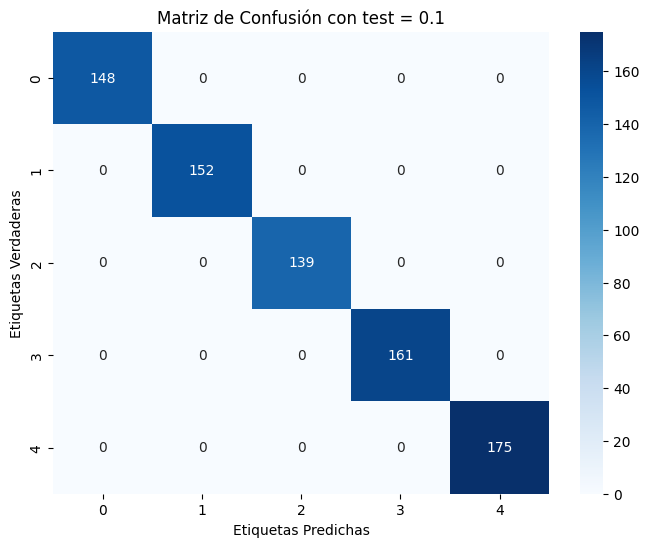

Exactitud del modelo: 1.0
Precisión del modelo: 1.0
Recall del modelo: 1.0
Puntuación F1 del modelo: 1.0
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.2.png


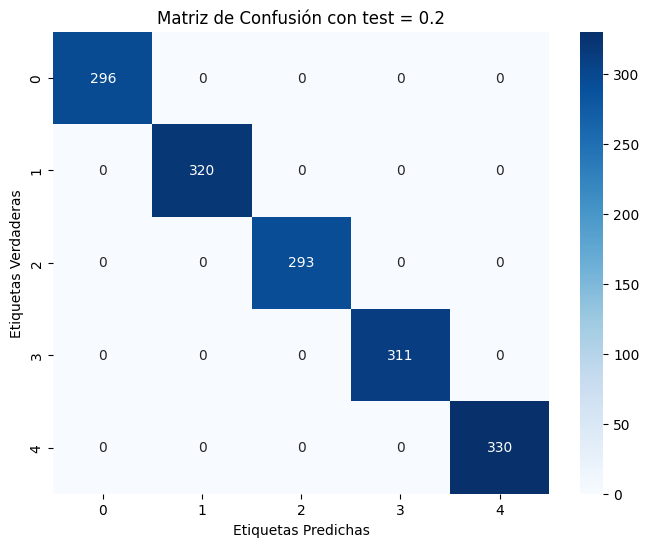

Exactitud del modelo: 1.0
Precisión del modelo: 1.0
Recall del modelo: 1.0
Puntuación F1 del modelo: 1.0
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.3.png


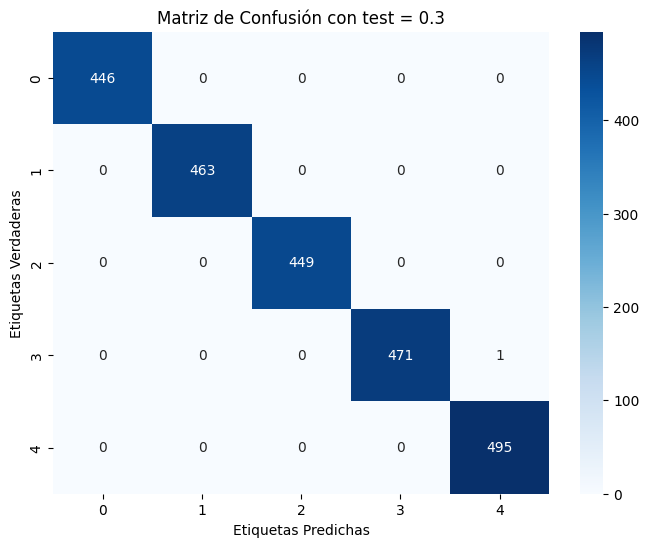

Exactitud del modelo: 0.9995698924731182
Precisión del modelo: 0.9995707596253902
Recall del modelo: 0.9995698924731182
Puntuación F1 del modelo: 0.9995698814271717
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.4.png


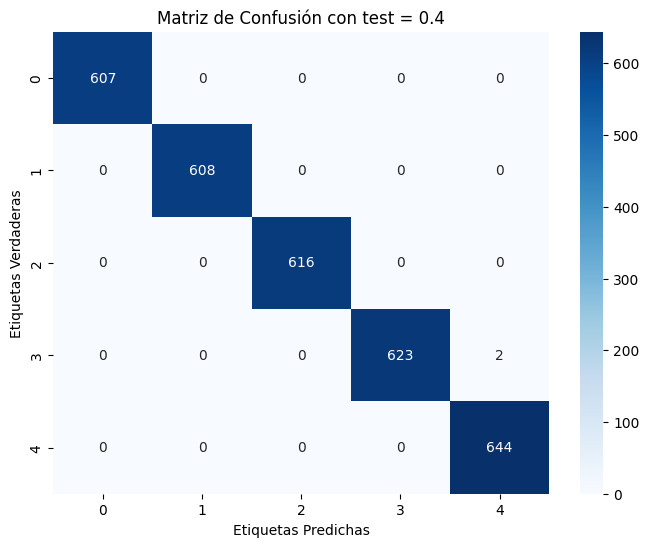

Exactitud del modelo: 0.9993548387096775
Precisión del modelo: 0.9993568361130529
Recall del modelo: 0.9993548387096775
Puntuación F1 del modelo: 0.9993548218785466
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.5.png


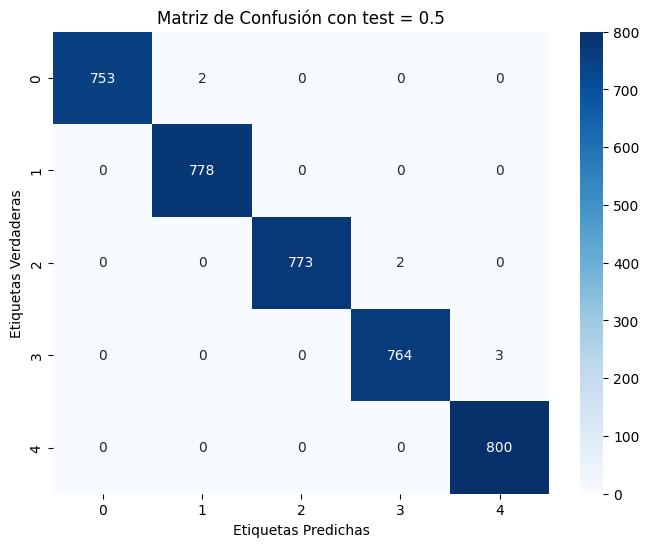

Exactitud del modelo: 0.9981935483870967
Precisión del modelo: 0.9981970903765632
Recall del modelo: 0.9981935483870967
Puntuación F1 del modelo: 0.9981935075856945
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.6.png


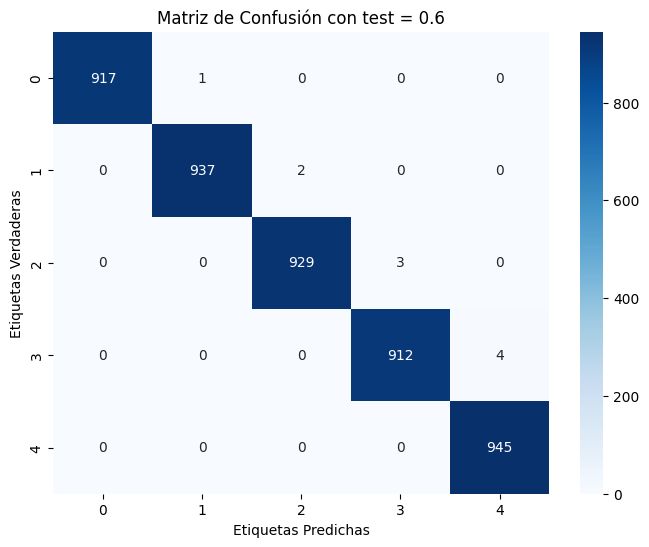

Exactitud del modelo: 0.9978494623655914
Precisión del modelo: 0.9978516917931525
Recall del modelo: 0.9978494623655914
Puntuación F1 del modelo: 0.9978494406004962
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.7.png


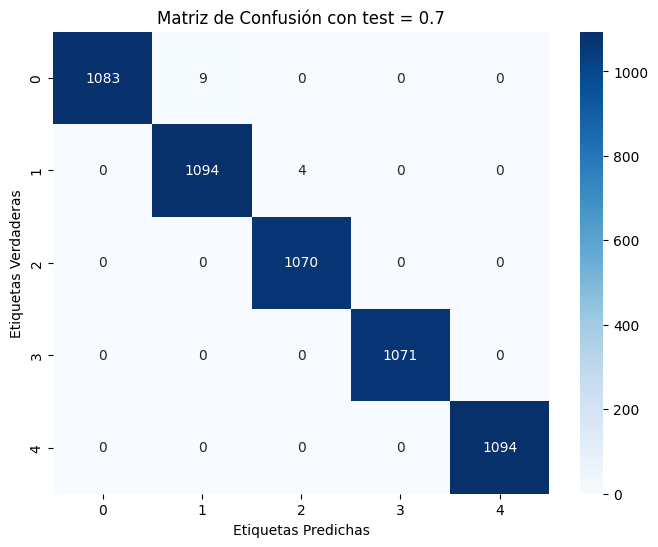

Exactitud del modelo: 0.9976036866359447
Precisión del modelo: 0.9976139530697252
Recall del modelo: 0.9976036866359447
Puntuación F1 del modelo: 0.9976036639021338
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.8.png


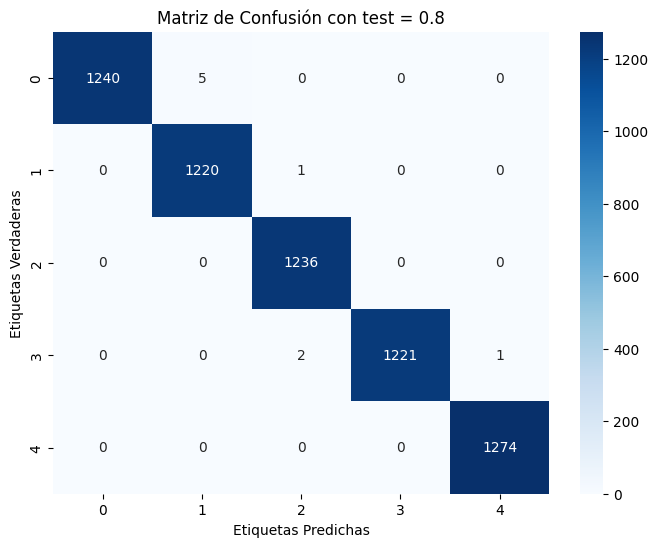

Exactitud del modelo: 0.9985483870967742
Precisión del modelo: 0.9985523185107832
Recall del modelo: 0.9985483870967742
Puntuación F1 del modelo: 0.9985483951022932
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.9.png


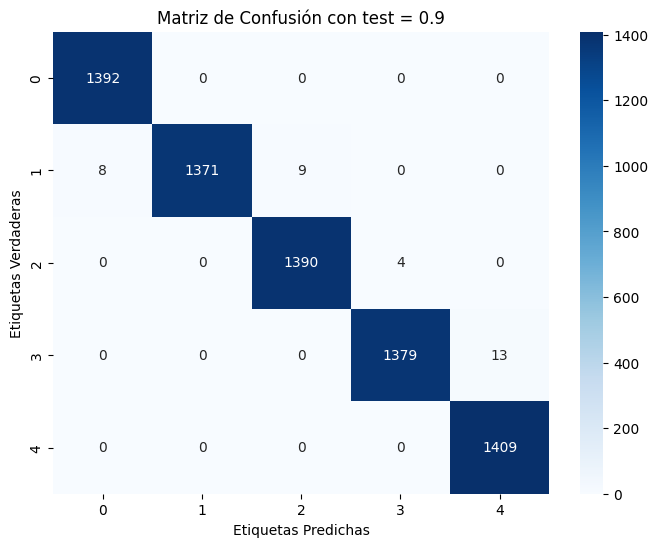

Exactitud del modelo: 0.9951254480286739
Precisión del modelo: 0.995149920637202
Recall del modelo: 0.9951254480286739
Puntuación F1 del modelo: 0.9951215776409412
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_11_vecinos/KNN_glove_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta KNN_glove_embeddings_val_cruz_11_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_2.png


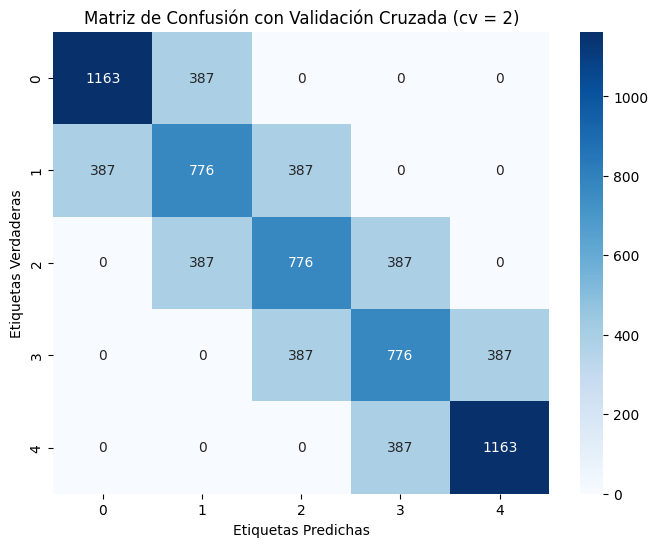

Exactitud media: 0.600516129032258
Precisión media: 0.600516129032258
Recall media: 0.600516129032258
Puntuación F1 media: 0.600516129032258
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_3.png


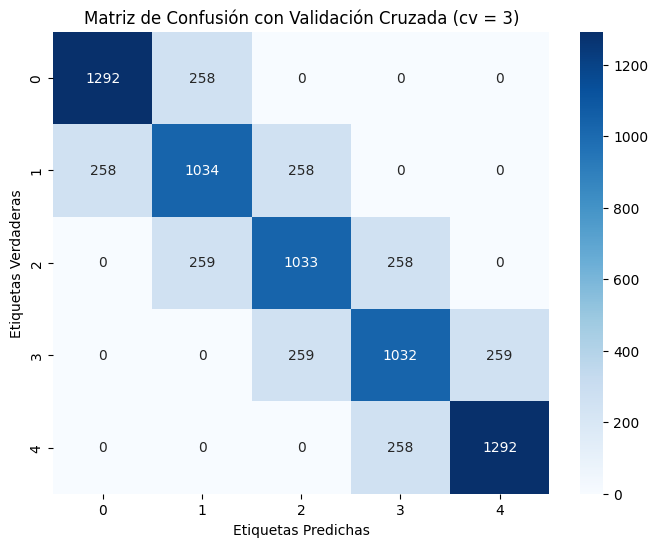

Exactitud media: 0.7332903225806452
Precisión media: 0.7332688588007736
Recall media: 0.7332903225806452
Puntuación F1 media: 0.7332795039564279
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_4.png


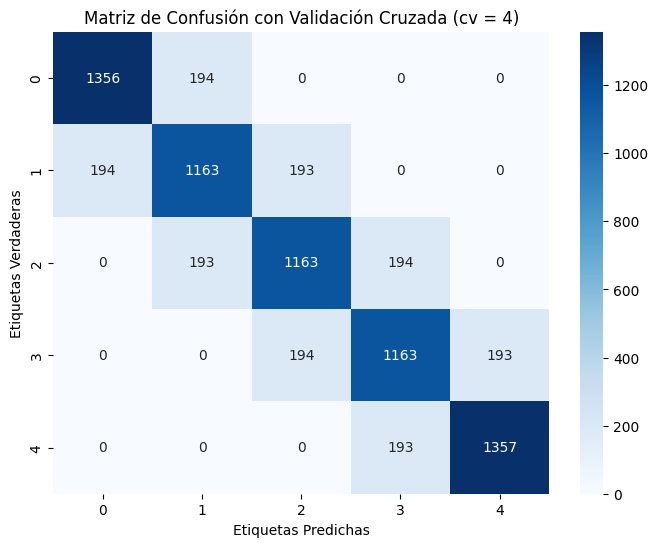

Exactitud media: 0.800258064516129
Precisión media: 0.800258064516129
Recall media: 0.800258064516129
Puntuación F1 media: 0.800258064516129
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_5.png


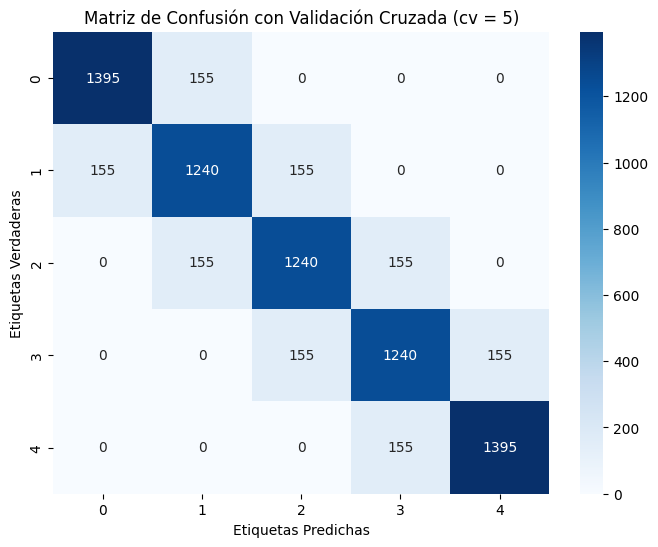

Exactitud media: 0.84
Precisión media: 0.84
Recall media: 0.84
Puntuación F1 media: 0.84
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_6.png


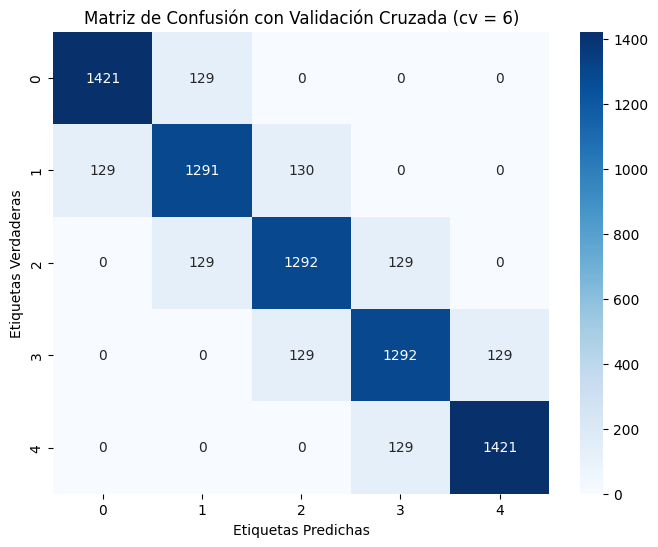

Exactitud media: 0.8667096774193548
Precisión media: 0.8667097328992208
Recall media: 0.8667096774193548
Puntuación F1 media: 0.8667096704776603
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_7.png


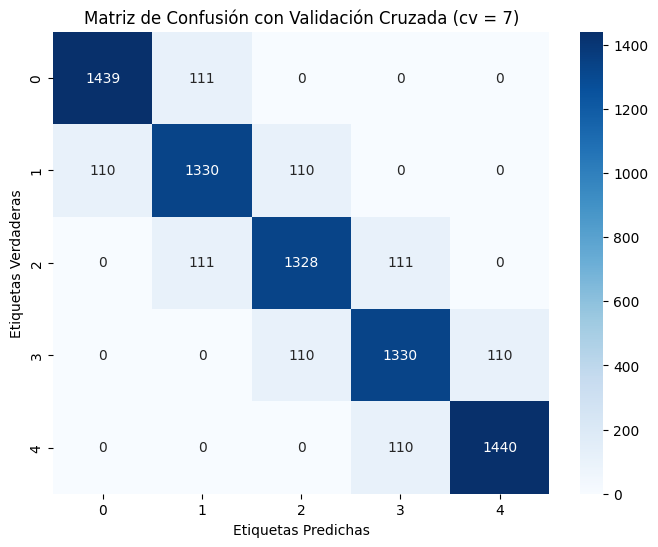

Exactitud media: 0.8860645161290323
Precisión media: 0.8860739767623165
Recall media: 0.8860645161290323
Puntuación F1 media: 0.8860690665104859
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_8.png


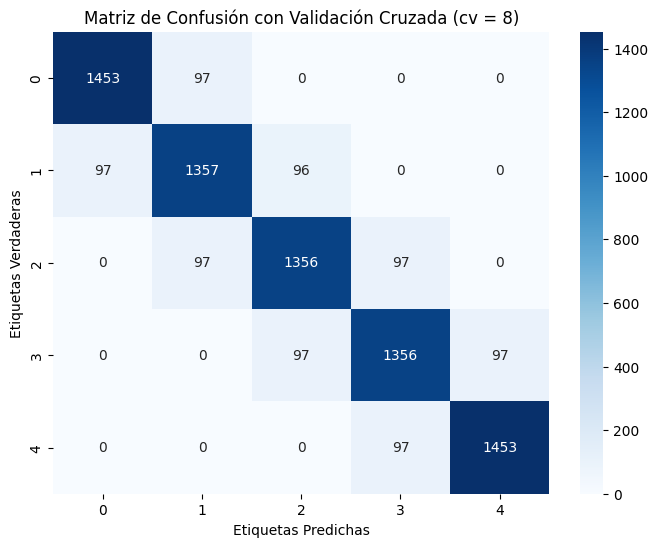

Exactitud media: 0.9
Precisión media: 0.9000000624618434
Recall media: 0.9
Puntuación F1 media: 0.8999999948037993
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_9.png


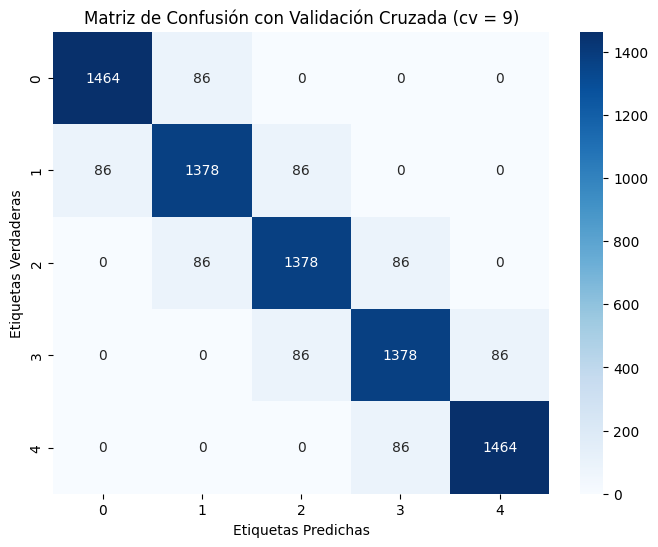

Exactitud media: 0.9112258064516129
Precisión media: 0.9112258064516129
Recall media: 0.9112258064516129
Puntuación F1 media: 0.9112258064516129
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_10.png


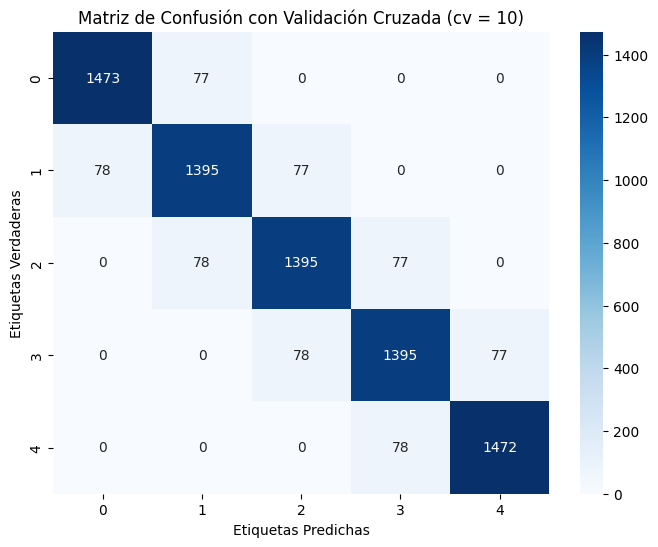

Exactitud media: 0.92
Precisión media: 0.9200000749219874
Recall media: 0.92
Puntuación F1 media: 0.9199999979188344
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_11_vecinos/KNN_glove_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta KNN_glove_embeddings_val_simple_13_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.1.png


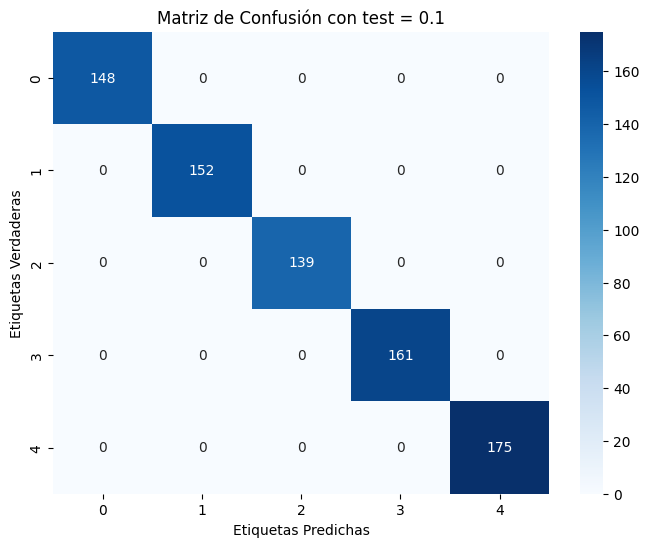

Exactitud del modelo: 1.0
Precisión del modelo: 1.0
Recall del modelo: 1.0
Puntuación F1 del modelo: 1.0
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.2.png


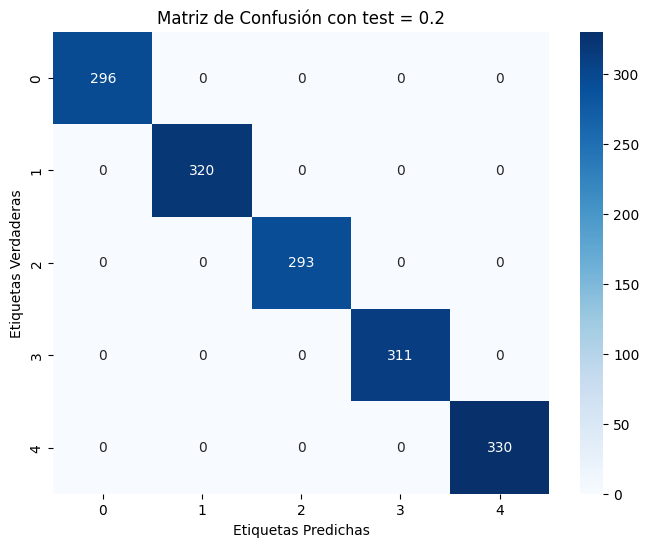

Exactitud del modelo: 1.0
Precisión del modelo: 1.0
Recall del modelo: 1.0
Puntuación F1 del modelo: 1.0
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.3.png


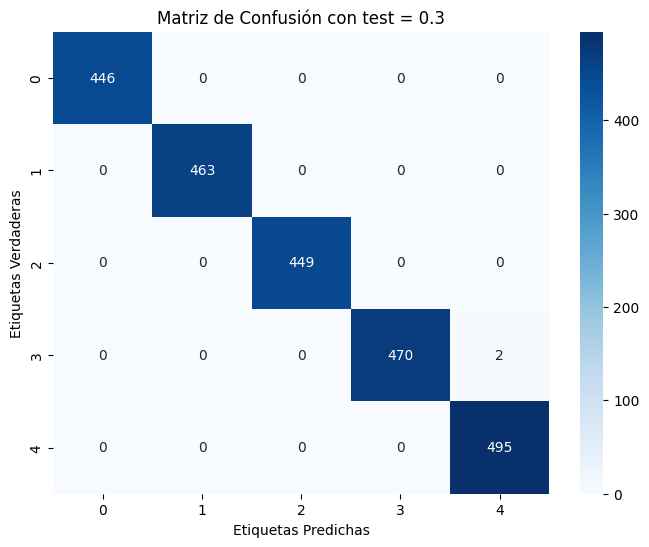

Exactitud del modelo: 0.9991397849462366
Precisión del modelo: 0.9991432465762315
Recall del modelo: 0.9991397849462366
Puntuación F1 del modelo: 0.9991397389190458
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.4.png


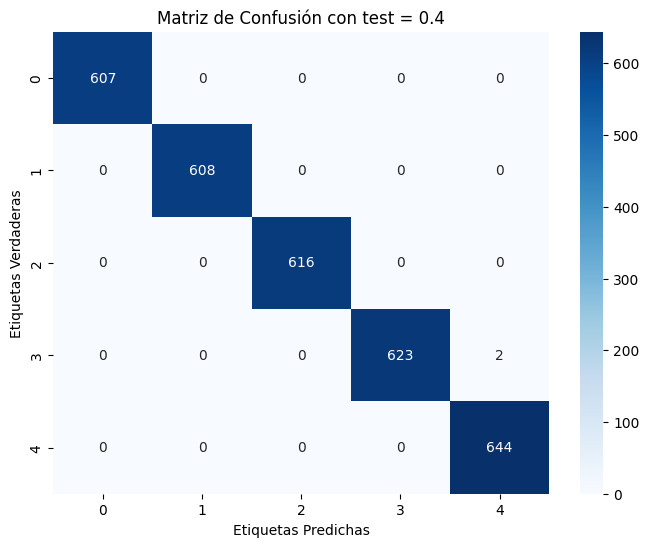

Exactitud del modelo: 0.9993548387096775
Precisión del modelo: 0.9993568361130529
Recall del modelo: 0.9993548387096775
Puntuación F1 del modelo: 0.9993548218785466
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.5.png


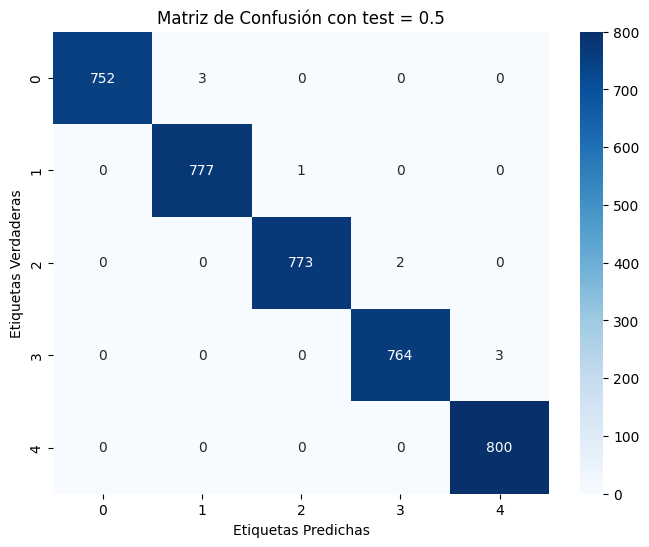

Exactitud del modelo: 0.9976774193548387
Precisión del modelo: 0.9976812896315053
Recall del modelo: 0.9976774193548387
Puntuación F1 del modelo: 0.997677365008905
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.6.png


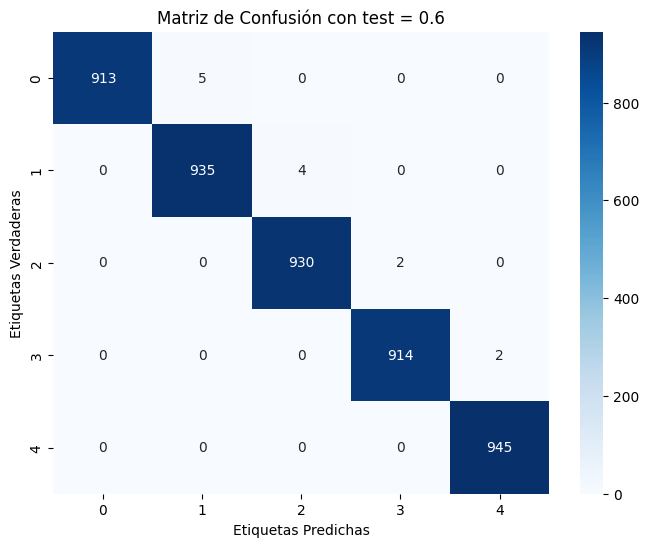

Exactitud del modelo: 0.9972043010752688
Precisión del modelo: 0.9972081953385517
Recall del modelo: 0.9972043010752688
Puntuación F1 del modelo: 0.9972042667821233
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.7.png


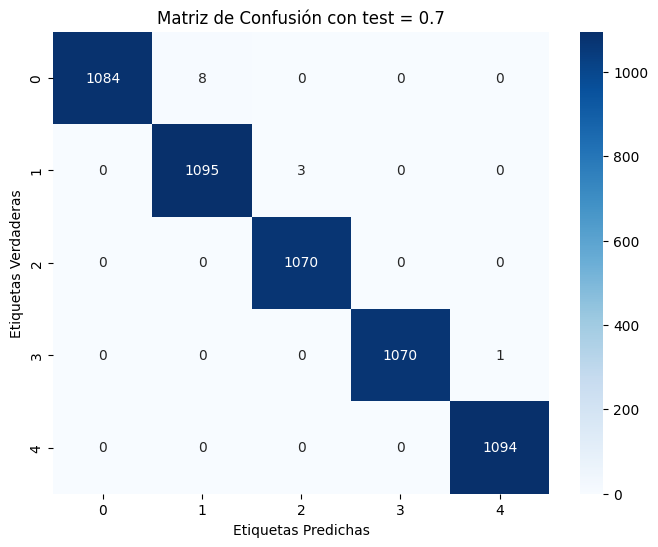

Exactitud del modelo: 0.9977880184331798
Precisión del modelo: 0.9977964176355021
Recall del modelo: 0.9977880184331798
Puntuación F1 del modelo: 0.9977879968990765
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.8.png


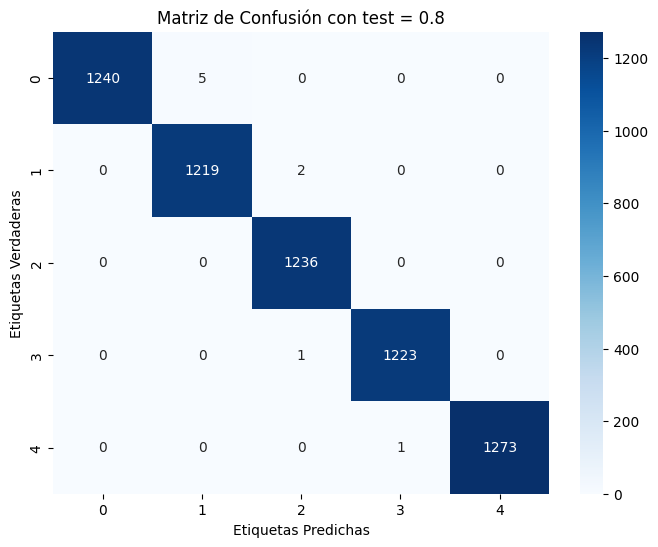

Exactitud del modelo: 0.9985483870967742
Precisión del modelo: 0.9985515352942708
Recall del modelo: 0.9985483870967742
Puntuación F1 del modelo: 0.9985485300273992
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.9.png


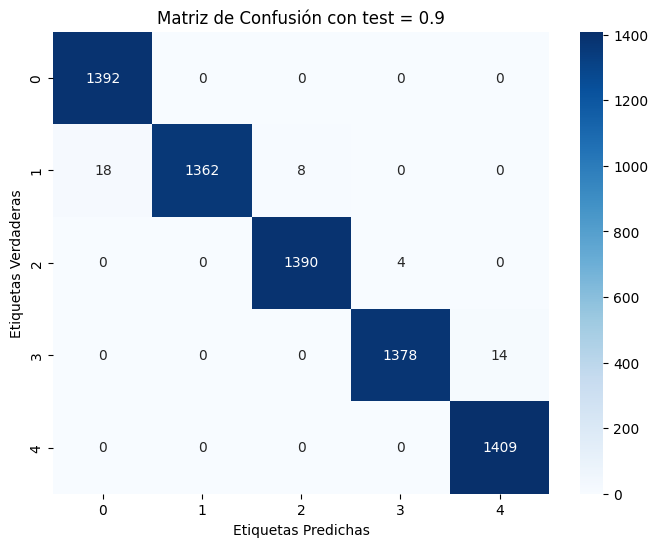

Exactitud del modelo: 0.9936917562724015
Precisión del modelo: 0.9937435800274693
Recall del modelo: 0.9936917562724015
Puntuación F1 del modelo: 0.9936839660414651
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_simple_13_vecinos/KNN_glove_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta KNN_glove_embeddings_val_cruz_13_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_2.png


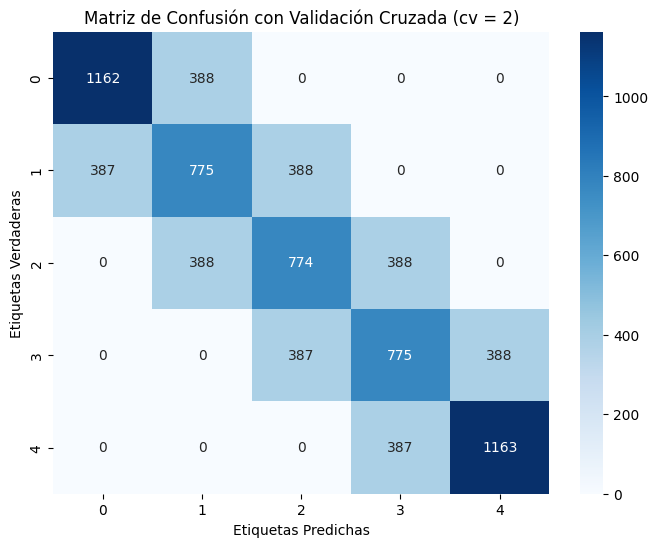

Exactitud media: 0.5998709677419355
Precisión media: 0.5998710093115543
Recall media: 0.5998709677419355
Puntuación F1 media: 0.5998709365110235
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_3.png


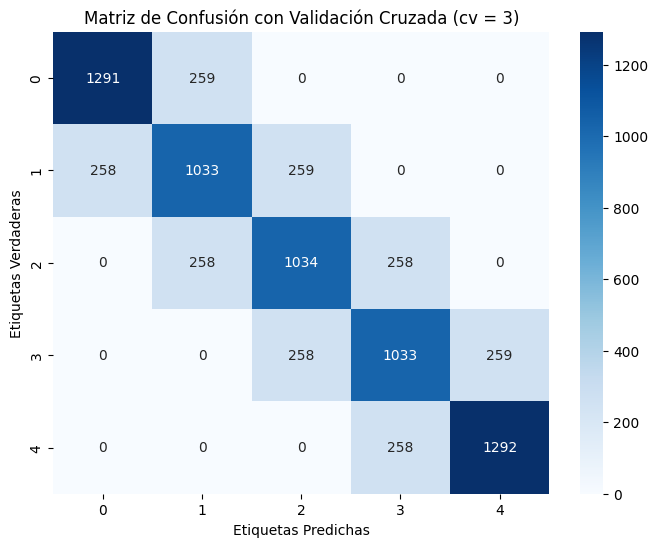

Exactitud media: 0.7332903225806452
Precisión media: 0.733290405827298
Recall media: 0.7332903225806452
Puntuación F1 media: 0.7332903017689886
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_4.png


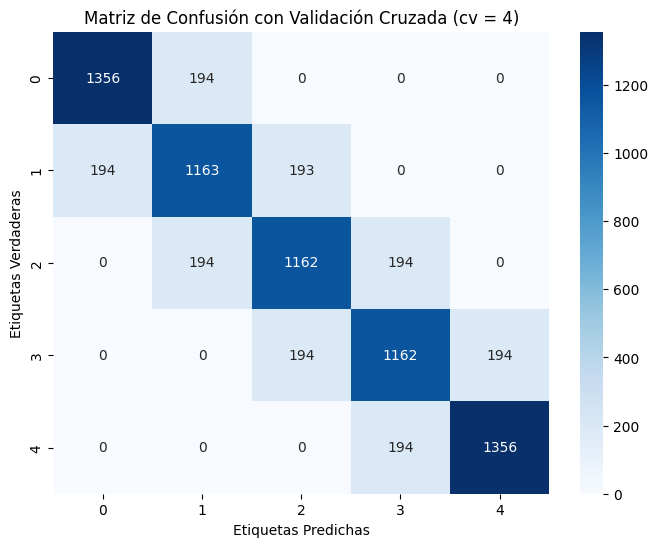

Exactitud media: 0.7998709677419354
Precisión media: 0.7998710093652619
Recall media: 0.7998709677419354
Puntuación F1 media: 0.7998709573361071
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_5.png


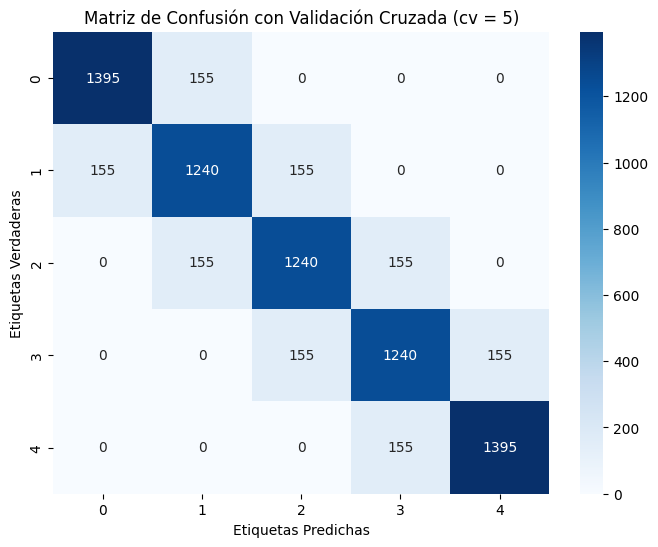

Exactitud media: 0.84
Precisión media: 0.84
Recall media: 0.84
Puntuación F1 media: 0.84
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_6.png


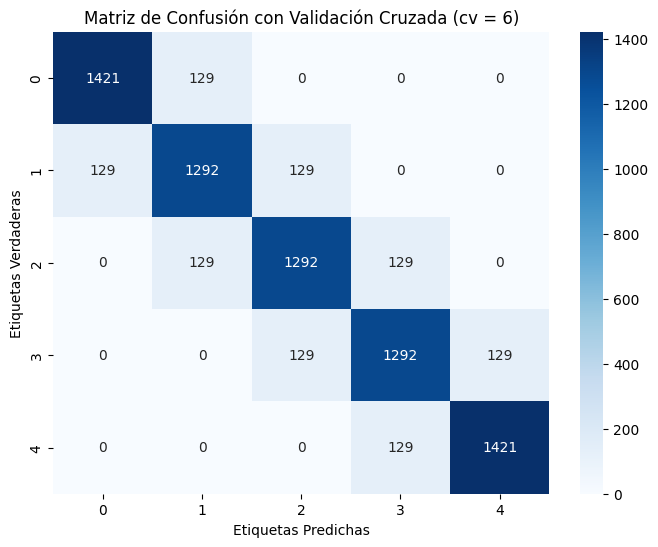

Exactitud media: 0.8668387096774194
Precisión media: 0.8668387096774194
Recall media: 0.8668387096774194
Puntuación F1 media: 0.8668387096774194
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_7.png


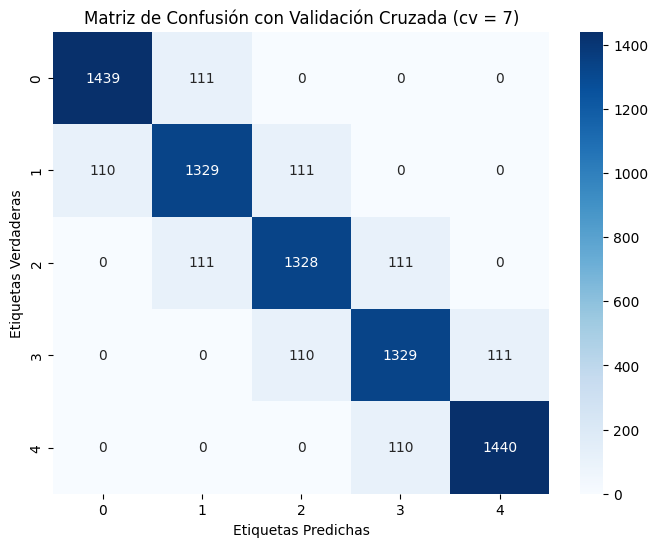

Exactitud media: 0.8858064516129033
Precisión media: 0.8858065824444169
Recall media: 0.8858064516129033
Puntuación F1 media: 0.885806442697458
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_8.png


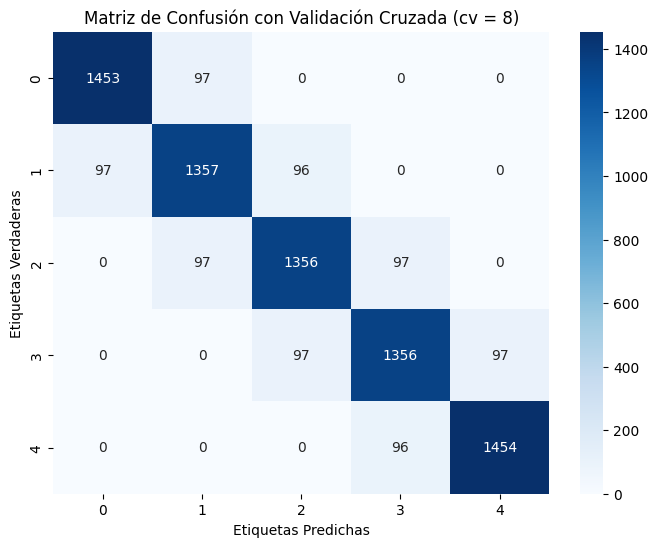

Exactitud media: 0.9001290322580645
Precisión media: 0.9001210874660631
Recall media: 0.9001290322580645
Puntuación F1 media: 0.9001249857066718
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_9.png


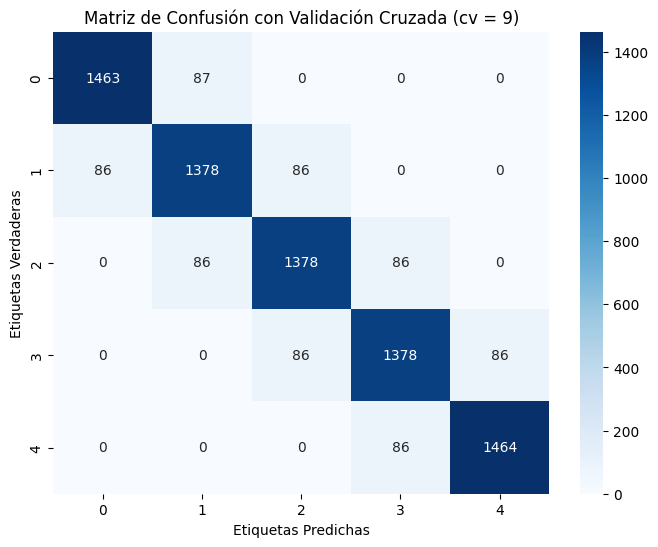

Exactitud media: 0.9110967741935484
Precisión media: 0.911104002742091
Recall media: 0.9110967741935484
Puntuación F1 media: 0.9111003503209387
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta KNN_glove_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_10.png


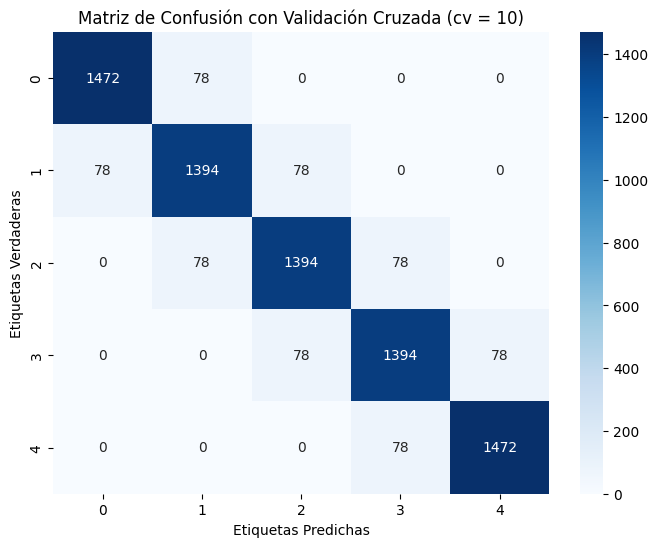

Exactitud media: 0.919483870967742
Precisión media: 0.919483870967742
Recall media: 0.919483870967742
Puntuación F1 media: 0.919483870967742
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/KNN_glove_embeddings_val_cruz_13_vecinos/KNN_glove_embeddings_val_cruz.json


In [6]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion,ruta_figura_incom):
    if validacion == "simple":
        ruta_archivo = ruta_figura_incom + "/KNN_glove_embeddings_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo =  ruta_figura_incom + "/KNN_glove_embeddings_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []
ruta_figura_incom = ""
# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}


lista = [3,5,7,9,11,13]

for numero in lista: 
    experimento = 1
    for i in lista_valores:
        resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion,ruta_figura_incom = knn_classification(datos,numero,test_size_1=i)
        experimento = experimento + 1
    
    almacenar_informacion(resultados_finales_val_simple,validacion,ruta_figura_incom)
    
    lista = list(range(2, 11))
    for j in lista:
        resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion,ruta_figura_incom = knn_classification(datos,numero,cv=j)
    
    almacenar_informacion(resultados_finales_val_cruz,validacion,ruta_figura_incom)